In [118]:
from haven import haven_jupyter as hj
from haven import haven_results as hr
from haven import haven_utils as hu
import pprint
import numpy as np
from experiments_config.syn_interp_exp import *
from experiments_config.kernelize_exp import *
from experiments_config.syn_vary_n_exp import *
from experiments_config.syn_cyclic_exp import *
from experiments_config.syn_check_alpha_beta import *
from experiments_config.syn_non_interp_exp import *
from exp_configs import get_exp_group
from copy import deepcopy

In [119]:
def form_exp_list(exp_groups, exp_config):
    exp_list = []
    for e in exp_groups:
        exp_list += get_exp_group(**exp_config)[e]
    return exp_list

# def form_exp_list(exp_groups, exp_config_fname):
#     exp_list = []
#     for e in exp_groups:
#         exp_list += hu.load_py(exp_config_fname).EXP_GROUPS[e]
#     return exp_list

In [120]:
EXP_SYN_NON_INTERP_CONFIGS={}
EXP_SYN_NON_INTERP_CONFIGS['max_epoch'] = 7000
EXP_SYN_NON_INTERP_CONFIGS['kappa'] =  [1024, 512, 256, 200, 100, 50] #[200, 100, 50]
EXP_SYN_NON_INTERP_CONFIGS['runs'] = [0,1,2]
EXP_SYN_NON_INTERP_CONFIGS['batch_size'] = [-10/9]
EXP_SYN_NON_INTERP_CONFIGS['benchmarks_list'] = ["synthetic_kappa"]
EXP_SYN_NON_INTERP_CONFIGS['losses'] = ["squared_loss"]
EXP_SYN_NON_INTERP_CONFIGS['is_kernelize'] = 0
EXP_SYN_NON_INTERP_CONFIGS['variance'] = [1, 1e-2, 1e-4, 1e-5, 1e-6] #[1,1e-2,1e-4]
opt_list = []

# SHB
opt_list += [{'name': 'EXP_SHB',
        'alpha_t': 'CNST',
        'method': 'WANG21',
        'is_sls': False,
        'mis_spec': 1.0,
        'ada': None,
        'ld': None,
        'ld_sche': None,
        'c':1
        }]

opt_list += [{'name': 'EXP_SHB',
        'alpha_t': 'EXP',
        'method': 'SEBBOUH',
        'is_sls': False,
        'mis_spec': 1.0,
        'ada': None,
        'ld': None,
        'ld_sche': None,
        'c': 1
        }]


opt_list += [{'name': 'Mix_SHB', 'c':0.5}]

# opt_list += [{'name': 'M_ASHB'}]
opt_list += [{'name': 'M_ASHB','I': 4,
                'p': 1,
                'c': 10}]

for C in [2,3,4]:
    opt_list += [{'name': 'M_SHB_PAN', 'C':C}]

# opt_list += [{'name': 'M_SHB_PAN'}]

opt_list += [{'name': 'EXP_SGD',
                      'alpha_t': 'DECR',
                      'is_sls': False,
                      'ada': None,
                      'new': True
                      }]

opt_list += [{'name': 'EXP_ACC_SGD',
                'alpha_t': "DECR",
                'rho': 1,
                'is_sls': False
                }]

EXP_SYN_NON_INTERP_CONFIGS['opt_list'] = opt_list

In [405]:
EXP_SYN_NON_INTERP_COMPARE_CONFIGS={}
EXP_SYN_NON_INTERP_COMPARE_CONFIGS['max_epoch'] = 7000
EXP_SYN_NON_INTERP_COMPARE_CONFIGS['kappa'] =  [1024, 512, 200, 100, 50] #[1024, 512, 256] [200, 100, 50]
EXP_SYN_NON_INTERP_COMPARE_CONFIGS['runs'] = [0,1,2]
EXP_SYN_NON_INTERP_COMPARE_CONFIGS['batch_size'] = [-10/9]
EXP_SYN_NON_INTERP_COMPARE_CONFIGS['benchmarks_list'] = ["synthetic_kappa"]
EXP_SYN_NON_INTERP_COMPARE_CONFIGS['losses'] = ["squared_loss"]
EXP_SYN_NON_INTERP_COMPARE_CONFIGS['is_kernelize'] = 0
EXP_SYN_NON_INTERP_COMPARE_CONFIGS['variance'] = [1,1e-2,1e-4, 1e-6] #[1e-2, 1e-4, 1e-5, 1e-6] [1,1e-2,1e-4]
opt_list_1 = []

for c in [1/32, 1/16, 1/8, 1/4, 1/2, 0.4, 'auto', 'auto10', 'auto50']:
    for beta in [True, False]:
        opt_list_1 += [{'name': 'M_ASHB', 'c':c, 'beta_const':beta}]

for C in [2, 4, 8, 16, 32, 'max']:
    opt_list_1 += [{'name': 'M_SHB_PAN', 'C':C}]
# for C in [2]:
#     opt_list_1 += [{'name': 'M_SHB_PAN', 'C':C}]

opt_list_1 += [{'name': 'EXP_SHB',
        'alpha_t': 'CNST',
        'method': 'WANG21',
        'is_sls': False,
        'mis_spec': 1.0,
        'ada': None,
        'ld': None,
        'ld_sche': None,
        'c':1
        }]

opt_list_1 += [{'name': 'Mix_SHB', 'c':0.5}]


EXP_SYN_NON_INTERP_COMPARE_CONFIGS['opt_list'] = opt_list_1

In [393]:
# path to where the experiments are saved
base = './outputs/'
savedir_base = base + 'output'
savedir_ijcnn = base + 'output_ijcnn'
savedir_mushroom = base + 'output_mushroom'
savedir_ijcnn_shb = base + 'output_ijcnn_shb'
savedir_mushroom_shb = base + 'output_mushroom_shb'
savedir_mushroom_shb_2 = base + 'output_mushroom_shb_2'
savedir_mushroom_shb_4 = base + 'output_mushroom_shb_4'
savedir_mushroom_fullbatch = base + 'output_mushroom_fullbatch'
savedir_mushroom_half = base + 'output_mushroom_half'
savedir_mushroom_fourth = base + 'output_mushroom_fourth'
savedir_ijcnn_half = base + 'output_ijcnn_half'
savedir_mushroom_misspec = base + 'output_mushroom_misspec_2'
savedir_mushroom_misspec_sgd = base + 'output_mushroom_misspec_sgd'
savedir_mushroom_misspec_sgd_shb = base + 'output_mushroom_misspec_sgd_shb'
savedir_mushroom_sgd_shb = base + 'output_mushroom_sgd_shb'
savedir_mushroom_sgd_shb_new = base + 'output_mushroom_sgd_shb_new'
savedir_mushroom_sgd_shb_fn = base + 'output_mushroom_sgd_shb_fn'
savedir_ijcnn_sgd_shb = base + 'output_ijcnn_sgd_shb'
savedir_ijcnn_sgd_shb_fn = base + 'output_ijcnn_sgd_shb_fn'
savedir_ijcnn_test_sls_shb = base + 'output_ijcnn_test_sls_shb'
savedir_rcv1_sgd_shb = base + 'output_rcv1_sgd_shb'
savedir_mushroom_test_sls = base + 'output_mushroom_test_sls'
savedir_mushroom_sgd_shb_cnst = base + 'output_mushroom_sgd_shb_cnst'
savedir_ijcnn_sgd_shb_cnst = base + 'output_ijcnn_sgd_shb_cnst'
savedir_rcv1_sgd_shb_cnst = base + 'output_rcv1_sgd_shb_cnst'
savedir_mushroom_ada_test = base + 'output_mushroom_ada_test'
savedir_mushroom_ada = base + 'output_mushroom_ada'
savedir_ijcnn_ada = base + 'output_ijcnn_ada'
savedir_mushroom_adam = base + 'output_mushroom_adam'
savedir_mushroom_adam_test = base + 'output_mushroom_adam_test'
savedir_synthetic_test = base + 'output_synthetic_test'
savedir_mushroom_full_test = base + 'output_mushroom_full_test'
savedir_mushroom_full_seb_wang = base + 'output_mushroom_full_seb_wang'
savedir_mushroom_ada_new = base + 'output_mushroom_ada_new'
savedir_mushroom_ada_fn = base + 'output_mushroom_ada_fn'
savedir_mushroom_ada_sche_1 = base + 'output_mushroom_ada_sche_1'
savedir_mushroom_misspec_3 = base + 'output_mushroom_misspec_3'
savedir_mushroom_misspec_4 = base + 'output_mushroom_misspec_4'
savedir_mushroom_misspec_5 = base + 'output_mushroom_misspec_5'
savedir_mushroom_misspec_6 = base + 'output_mushroom_misspec_6'
savedir_mushroom_misspec_7 = base + 'output_mushroom_misspec_7'
savedir_mushroom_misspec_8 = base + 'output_mushroom_misspec_8'
savedir_mushroom_misspec_9 = base + 'output_mushroom_misspec_9'
savedir_mushroom_misspec_10 = base + 'output_mushroom_misspec_10'
savedir_mushroom_misspec_11 = base + 'output_mushroom_misspec_11'

savedir_synthetic_test_1 = base + 'output_synthetic_test_1'
savedir_synthetic_test_2 = base + 'output_synthetic_test_2'
savedir_synthetic_test_3 = base + 'output_synthetic_test_3'
savedir_synthetic_test_4 = base + 'output_synthetic_test_4'
savedir_synthetic_test_5 = base + 'output_synthetic_test_5'
savedir_synthetic_test_6 = base + 'output_synthetic_test_6'
savedir_synthetic_kappa_1000 = base + 'output_synthetic_kappa_1000'
savedir_synthetic_kappa_100 = base + 'output_synthetic_kappa_100'
savedir_synthetic_kappa_10 = base + 'output_synthetic_kappa_10'
savedir_synthetic_kappa_1 = base + 'output_synthetic_kappa_1'
savedir_synthetic_kappa_2 = base + 'output_synthetic_kappa_2'
savedir_synthetic_kappa_3 = base + 'output_synthetic_kappa_3'
savedir_synthetic_kappa_4 = base + 'output_synthetic_kappa_4'
savedir_synthetic_kappa_5 = base + 'output_synthetic_kappa_5'
savedir_synthetic_kappa_6 = base + 'output_synthetic_kappa_6'
savedir_synthetic_kappa_7 = base + 'output_synthetic_kappa_7'
savedir_synthetic_kappa_exp_1 = base + 'output_synthetic_kappa_exp_1'
savedir_synthetic_kappa_exp_2 = base + 'output_synthetic_kappa_exp_2'
savedir_synthetic_kappa_fn_200 = base + 'output_synthetic_kappa_fn_200'
savedir_synthetic_kappa_fn_100 = base + 'output_synthetic_kappa_fn_100'
savedir_synthetic_kappa_fn_50 = base + 'output_synthetic_kappa_fn_50'
savedir_synthetic_kappa_fn_25 = base + 'output_synthetic_kappa_fn_25'
savedir_synthetic_kappa_fn_10 = base + 'output_synthetic_kappa_fn_10'
savedir_synthetic_kappa_fn_5 = base + 'output_synthetic_kappa_fn_5'
savedir_synthetic_kappa_fn_2 = base + 'output_synthetic_kappa_fn_2'
savedir_synthetic_kappa_cnst_200 = base + 'output_synthetic_kappa_cnst_200'
savedir_synthetic_kappa_cnst_100 = base + 'output_synthetic_kappa_cnst_100'
savedir_synthetic_kappa_cnst_50 = base + 'output_synthetic_kappa_cnst_50'
savedir_synthetic_kappa_cnst_25 = base + 'output_synthetic_kappa_cnst_25'
savedir_synthetic_kappa_cnst_10 = base + 'output_synthetic_kappa_cnst_10'
savedir_synthetic_kappa_cnst_5 = base + 'output_synthetic_kappa_cnst_5'
savedir_synthetic_kappa_cnst_200_1 = base + 'output_synthetic_kappa_cnst_200_1'
savedir_synthetic_kappa_cnst_200_2 = base + 'output_synthetic_kappa_cnst_200_2'
savedir_synthetic_kappa_full = base + 'output_synthetic_kappa_full'
savedir_synthetic_kappa_full_1 = base + 'output_synthetic_kappa_full_1'
savedir_synthetic_kappa_full_2 = base + 'output_synthetic_kappa_full_2'
savedir_synthetic_kappa_full_3 = base + 'output_synthetic_kappa_full_3'
savedir_synthetic_kappa_exp = base + 'output_synthetic_kappa_exp'
savedir_synthetic_kappa_exp_fn = base + 'output_synthetic_kappa_exp_fn'
savedir_synthetic_kappa_mis_mu_1 = base + 'output_synthetic_kappa_mis_mu_1'
savedir_synthetic_kappa_mis_mu_2 = base + 'output_synthetic_kappa_mis_mu_2'
savedir_synthetic_kappa_mis_mu_3 = base + 'output_synthetic_kappa_mis_mu_3'
savedir_synthetic_kappa_mis_mu_4 = base + 'output_synthetic_kappa_mis_mu_4'
savedir_synthetic_kappa_mis_mu_5 = base + 'output_synthetic_kappa_mis_mu_5'

savedir_synthetic_kappa_test_exp_1 = base + 'output_synthetic_kappa_test_exp_1'
savedir_synthetic_kappa_test_exp_2 = base + 'output_synthetic_kappa_test_exp_2'
savedir_synthetic_kappa_test_exp_3 = base + 'output_synthetic_kappa_test_exp_3'

savedir_synthetic_kappa_rit_shb_1 = base + 'output_synthetic_kappa_rit_shb_1'
savedir_synthetic_kappa_rit_shb_2 = base + 'output_synthetic_kappa_rit_shb_2'
savedir_synthetic_kappa_rit_shb_3 = base + 'output_synthetic_kappa_rit_shb_3'

savedir_synthetic_kappa_mashb_2 = base + 'output_synthetic_kappa_mashb_2'
savedir_synthetic_kappa_mashb_3 = base + 'output_synthetic_kappa_mashb_3'
savedir_synthetic_kappa_mashb_5 = base + 'output_synthetic_kappa_mashb_5'

savedir_synthetic_shb_nes_2 = base + 'output_synthetic_shb_nes_2'
savedir_synthetic_shb_nes_3 = base + 'output_synthetic_shb_nes_3'
savedir_synthetic_shb_nes_4 = base + 'output_synthetic_shb_nes_4'

savedir_synthetic_var_shb_1 = base + 'output_synthetic_vara_shb_1'
savedir_synthetic_var_shb_2 = base + 'output_synthetic_var_shb_2'
savedir_synthetic_var_shb_3 = base + 'output_synthetic_var_shb_3'
savedir_synthetic_var_shb_4 = base + 'output_synthetic_var_shb_4'
savedir_synthetic_var_shb_5 = base + 'output_synthetic_var_shb_5'
savedir_synthetic_var_shb_6 = base + 'output_synthetic_var_shb_6'
savedir_synthetic_var_shb_7 = base + 'output_synthetic_var_shb_7'
savedir_synthetic_var_shb_8 = base + 'output_synthetic_var_shb_8'
savedir_synthetic_var_shb_9 = base + 'output_synthetic_var_shb_9'
savedir_synthetic_var_shb_11 = base + 'output_synthetic_var_shb_11'
savedir_synthetic_var_shb_12 = base + 'output_synthetic_var_shb_12'
savedir_synthetic_var_shb_13 = base + 'output_synthetic_var_shb_13'
savedir_synthetic_var_shb_14 = base + 'output_synthetic_var_shb_14'

savedir_synthetic_shb_c_1 = base + 'output_synthetic_shb_c_1'
savedir_synthetic_shb_c_2 = base + 'output_synthetic_shb_c_2'

savedir_synthetic_quad_1 = base + 'output_synthetic_quad_1'
savedir_synthetic_quad_2 = base + 'output_synthetic_quad_2'
savedir_synthetic_quad_3 = base + 'output_synthetic_quad_3'
savedir_synthetic_quad_4 = base + 'output_synthetic_quad_4'
savedir_synthetic_quad_5 = base + 'output_synthetic_quad_5'
savedir_synthetic_quad_6 = base + 'output_synthetic_quad_6'
savedir_synthetic_quad_test = base + 'output_synthetic_quad_test'

savedir_synthetic_batch_test = base + 'output_synthetic_batch_test'
savedir_synthetic_batch_1 = base + 'output_synthetic_batch_1'
savedir_synthetic_batch_2 = base + 'output_synthetic_batch_2'

savedir_synthetic_robust_1 = base + 'output_synthetic_robust_1'

savedir_ijcnn_shb_test = base + 'output_ijcnn_shb_test'

savedir_rcv1_test_2 = base + 'output_rcv1_test_2'

savedir_a_test_1 = base + 'output_a_test_1'
savedir_a_test_2 = base + 'output_a_test_2'
savedir_a_test_3 = base + 'output_a_test_3'
savedir_a_test_4 = base + 'output_a_test_4'
savedir_a_test_5 = base + 'output_a_test_5'
savedir_a_test_6 = base + 'output_a_test_6'

savedir_rcv1_kernel = base + 'output_rcv1_kernel'
savedir_mushroom_kernel = base + 'output_mushroom_kernel'
savedir_mushrooms_kernel_1 = base + 'output_mushrooms_kernel_1'
savedir_mushrooms_kernel_2 = base + 'output_mushrooms_kernel_2'
savedir_mushroom_kernel_2 = base + 'output_mushroom_kernel_2'

savedir_synthetic_interp_1 = base + 'output_synthetic_interp_1'
savedir_synthetic_interp_2 = base + 'output_synthetic_interp_2'
savedir_synthetic_interp_3 = base + 'output_synthetic_interp_3'
savedir_synthetic_interp_4 = base + 'output_synthetic_interp_4'
savedir_synthetic_interp_5 = base + 'output_synthetic_interp_5'

savedir_synthetic_varyn_1 = base + 'output_synthetic_varyn_1'
savedir_synthetic_varyn_2 = base + 'output_synthetic_varyn_2'

savedir_synthetic_cyclic_1 = base + 'output_synthetic_cyclic_1'
savedir_synthetic_check_alpha_beta_4 = base + 'output_synthetic_check_alpha_beta_4'
savedir_synthetic_check_alpha_beta_5 = base + 'output_synthetic_check_alpha_beta_5'

savedir_mushroom_kernel_final = base + 'output_mushroom_kernel_final'
savedir_mushroom_kernel_final_1 = base + 'output_mushroom_kernel_final_1'
savedir_mushroom_kernel_batch = base + 'output_mushroom_kernel_batch'
savedir_rcv1_kernel_batch = base + 'output_rcv1_kernel_batch'

savedir_synthetic_non_interp_0 = base + 'output_synthetic_non_interp_0'
savedir_synthetic_non_interp_1 = base + 'output_synthetic_non_interp_1'
savedir_synthetic_non_interp_2 = base + 'output_synthetic_non_interp_2'

savedir_synthetic_non_interp_test_1 = base + 'output_synthetic_non_interp_test_1'
savedir_synthetic_non_interp_compare_0 = base + 'output_synthetic_non_interp_compare_0'

exp_config_fname = './exp_configs.py'

# runs=2

batch_sizes = {-2: 'HALF', -1: 'FULL', -4./3: 'THREE_FOURTH', 100: '100'}


In [352]:



# print(form_exp_list(["exp_mushrooms", "exp_ijcnn","exp_rcv1"],exp_config_fname))


markersize = 8
markevery = 15
linewidth = 1
marker = None
styles = {}

styles['EXP_SGD_CNST'] = {'label':'K-CNST',  'color':'red','marker':marker ,
                         'markersize':markersize,
                           'linewidth': linewidth,
                     'markevery':markevery }

styles['EXP_SGD_DECR'] = {'label':'K-EXP',  'color':'orange','marker':marker ,
                         'markersize':markersize,
                           'linewidth': linewidth,
                     'markevery':markevery }


# styles['EXP_ACC_SGD_CNST'] = {'label':'ACC-K-CNST',  'color':'orange','marker':marker ,
#                          'markersize':15, 'marker':'x',
#                            'linewidth': 2,
#                      'markevery':markevery }

# styles['EXP_ACC_SGD_DECR'] = {'label':'ACC-K-EXP',  'color':'red','marker':marker ,
#                          'markersize':15, 'marker':'o',
#                            'linewidth': 2,
#                      'markevery':markevery }

# styles['EXP_SLS_DECR'] = {'label':'SLS-EXP',  'color':'green','marker':marker ,
#                          'markersize':15, 'marker':'+',
#                            'linewidth': 2,
#                      'markevery':markevery }

# styles['RIT_SGD'] = {'label':'KR-20',  'color':'black','marker':marker ,
#                          'markersize':15, 'marker':'s',
#                            'linewidth': 2,
#                      'markevery':markevery }

styles['EXP_SLS_DECR'] = {'label':'SLS-EXP',  'color':'yellow','marker':marker ,
                         'markersize':markersize,
                           'linewidth': linewidth,
                     'markevery':markevery }

styles['EXP_SHB_CNST'] = {'label':'SHB-CNST',  'color':'black','marker':marker ,
                         'markersize':markersize,
                           'linewidth': linewidth,
                     'markevery':markevery }

styles['EXP_SHB_SLS'] = {'label':'SHB-SLS-EXP',  'color':'cyan','marker':marker ,
                         'markersize':markersize,
                           'linewidth': linewidth,
                     'markevery':markevery }


styles['EXP_SHB_EXP'] = {'label':'SHB-EXP',  'color':'blue','marker':marker ,
                         'markersize':markersize, 
                           'linewidth': linewidth,
                     'markevery':markevery }


In [372]:
# def form_exp_list(exp_groups, exp_config_fname):
#     exp_list = []
#     for e in exp_groups:
#         exp_list += hu.load_py(exp_config_fname).EXP_GROUPS[e]
#     return exp_list


# print(form_exp_list(["exp_mushrooms", "exp_ijcnn","exp_rcv1"],exp_config_fname))


markersize = 15
markevery = 1000
linewidth = 3
shb = 'solid'
sgd = 'dotted'
styles = {}

styles['SHB_CNST_SEBBOUH'] = {'label':'SHB-CNST',  'color':'black',
                         'markersize':markersize, 'marker':'o',
                           'linewidth': linewidth, 
                     'markevery':markevery }
styles['SHB_CNST_ADA'] = {'label':'SHB-ADA',  'color':'black',
                         'markersize':markersize, 'marker':'*',
                           'linewidth': linewidth,
                     'markevery':markevery }
# styles['SHB_CNST_WANG22_THREE_FOURTH'] = {'label':'SHB-CNST-THREE-FOURTH',  'color':'red',
#                          'markersize':markersize, 'marker':'*',
#                            'linewidth': linewidth,
#                      'markevery':markevery }

styles['SGD_CNST'] = {'label':'SGD',  'color':'black',
                         'marker':'o', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SGD_EXP'] = {'label':'SGD-EXP',  'color':'black',
                         'marker':'d', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_CNST'] = {'label':'SHB',  'color':'blue',
                         'marker':'o', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_MUL'] = {'label':'Multi-SHB',  'color':'green',
                         'marker':'*', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_MUL_PAN'] = {'label':'Multi-SHB-Pan-et-al',  'color':'gold',
                         'marker':'h', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_EXP'] = {'label':'SHB-EXP',  'color':'darkcyan',
                         'marker':'v', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SGD_ACC'] = {'label':'Nesterov',  'color':'cyan',
                         'marker':'h', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SGD_ACC_EXP'] = {'label':'Nesterov-EXP',  'color':'purple',
                         'marker':'s', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_MIX_0.3'] = {'label':'2P-SHB-0.3',  'color':'red',
                         'marker':None,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_MIX_0.5'] = {'label':'2P-SHB',  'color':'red',
                         'marker':'P', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_MIX_0.7'] = {'label':'2P-SHB-0.7',  'color':'red',
                         'marker':None,
                           'linewidth': linewidth, 'linestyle':'dashed',
                     'markevery':markevery }

styles['SHB_EXP_BETA'] = {'label':'SHB-EXP-BETA-EXP',  'color':'red',
                         'marker':None,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['MASG_1'] = {'label':'MASG-1',  'color':'orange',
                         'marker':None,
                           'linewidth': linewidth, 'linestyle':sgd,
                     'markevery':markevery }
styles['MASHB_3'] = {'label':'MASHB-3',  'color':'orange',
                         'marker':None,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['MASG_2'] = {'label':'MASG-2',  'color':'red',
                         'marker':None,
                           'linewidth': linewidth, 'linestyle':sgd,
                     'markevery':markevery }
styles['MASHB_2'] = {'label':'MASHB-2',  'color':'red',
                         'marker':None,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }


styles['SHB_CNST_1.0'] = {'label':'SHB-1.0',  'color':'darkcyan',
                         'marker':'d', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_CNST_1'] = {'label':'SHB-1.0',  'color':'darkcyan',
                         'marker':'d', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_CNST_0.9'] = {'label':'SHB-0.9',  'color':'m',
                         'marker':'v', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_CNST_0.8'] = {'label':'SHB-0.8',  'color':'red',
                         'marker':'s', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_CNST_0.7'] = {'label':'SHB-0.7',  'color':'brown',
                         'marker':'p', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_CNST_0.6'] = {'label':'SHB-0.6',  'color':'orange',
                         'marker':'8', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_CNST_0.5'] = {'label':'SHB-0.5',  'color':'mediumpurple',
                         'marker':'H', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_CNST_0.4'] = {'label':'SHB-0.4',  'color':'skyblue',
                         'marker':'X', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_CNST_0.3'] = {'label':'SHB-0.3',  'color':'green',
                         'marker':'x', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_CNST_0.25'] = {'label':'SHB-0.25',  'color':'cyan',
                         'marker':'>', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_CNST_0.12'] = {'label':'SHB-0.125',  'color':'pink',
                         'marker':'h', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }

styles['SHB_1'] = {'label':'SHB-1',  'color':'purple',
                         'markersize':markersize, 'marker':'*',
                           'linewidth': linewidth,
                     'markevery':markevery }
styles['SHB_0.25'] = {'label':'SHB-0.25',  'color':'m',
                         'markersize':markersize, 'marker':'*',
                           'linewidth': linewidth,
                     'markevery':markevery }
styles['SHB_EXP_1.0'] = {'label':'SHB-mis-1.0',  'color':'black',
                         'marker':None,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_EXP_0.001'] = {'label':'SHB-mis-0.001',  'color':'m',
                         'marker':None,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_EXP_1e-05'] = {'label':'SHB-mis-1e-05',  'color':'red',
                         'marker':None,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_EXP_1e-07'] = {'label':'SHB-mis-1e-07',  'color':'orange',
                         'marker':None,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_EXP_0.0'] = {'label':'SHB-mis-0.0',  'color':'cyan',
                         'marker':None,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery } 
styles['SHB_EXP_0.1'] = {'label':'SHB-mis-0.1',  'color':'blue',
                         'marker':None,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery } 
styles['SHB_EXP_100'] = {'label':'SHB-mis-100',  'color':'green',
                         'marker':None,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery } 
styles['SHB_EXP_10'] = {'label':'SHB-mis-10',  'color':'yellow',
                         'marker':None,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery } 
styles['SHB_EXP_10000'] = {'label':'SHB-mis-10000',  'color':'brown',
                         'marker':None,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery } 

# styles['EXP_SGD_CNST_THREE_FOURTH'] = {'label':'K-CNST-THREE-FOURTH',  'color':'red',
#                          'markersize':markersize, 'marker':'o',
#                            'linewidth': linewidth,
#                      'markevery':markevery }

# styles['EXP_SLS_DECR'] = {'label':'SLS-EXP',  'color':'yellow',
#                          'markersize':markersize, 'marker':'+',
#                            'linewidth': linewidth,
#                      'markevery':markevery }

# styles['SHB_EXP_POLYAK_1'] = {'label':'SHB-EXP-POLYAK',  'color':'black',
#                          'markersize':markersize, 'marker':'*',
#                            'linewidth': linewidth,
#                      'markevery':markevery }
# styles['SHB_CNST_POLYAK_1'] = {'label':'SHB-CNST-POLYAK',  'color':'black',
#                          'markersize':markersize, 'marker':'o',
#                            'linewidth': linewidth,
#                      'markevery':markevery }
# styles['SHB_EXP_POLYAK_100'] = {'label':'SHB-EXP-POLYAK-MIS',  'color':'blue',
#                          'markersize':markersize, 'marker':'*',
#                            'linewidth': linewidth,
#                      'markevery':markevery }
# styles['SHB_CNST_POLYAK_100'] = {'label':'SHB-CNST-POLYAK-MIS',  'color':'blue',
#                          'markersize':markersize, 'marker':'o',
#                            'linewidth': linewidth,
#                      'markevery':markevery }

# styles['SHB_EXP_GHADIMI'] = {'label':'SHB-EXP-GHADIMI',  'color':'orange',
#                          'markersize':markersize, 'marker':'*',
#                            'linewidth': 1,
#                      'markevery':markevery }
# styles['SHB_CNST_GHADIMI'] = {'label':'SHB-CNST-GHADIMI',  'color':'orange',
#                          'markersize':markersize, 'marker':'o',
#                            'linewidth': linewidth,
#                      'markevery':markevery }

# styles['SHB_EXP_WANG21'] = {'label':'SHB-EXP-WANG21',  'color':'blue',
#                          'markersize':markersize, 'marker':'*',
#                            'linewidth': linewidth,
#                      'markevery':markevery }
# styles['SHB_CNST_WANG21'] = {'label':'SHB-CNST-WANG21',  'color':'blue',
#                          'markersize':markersize, 'marker':'o',
#                            'linewidth': linewidth,
#                      'markevery':markevery }

# styles['SHB_EXP_WANG22_1'] = {'label':'SHB-EXP-WANG22',  'color':'cyan',
#                          'markersize':markersize, 'marker':'*',
#                            'linewidth': linewidth,
#                      'markevery':markevery }
# styles['SHB_CNST_WANG22_1'] = {'label':'SHB-CNST-WANG22',  'color':'cyan',
#                          'markersize':markersize, 'marker':'o',
#                            'linewidth': linewidth,
#                      'markevery':markevery }

# styles['SHB_EXP_WANG22_100'] = {'label':'SHB-EXP-WANG22-MIS',  'color':'orange',
#                          'markersize':markersize, 'marker':'*',
#                            'linewidth': linewidth,
#                      'markevery':markevery }
# styles['SHB_CNST_WANG22_100'] = {'label':'SHB-CNST-WANG22-MIS',  'color':'orange',
#                          'markersize':markersize, 'marker':'o',
#                            'linewidth': linewidth,
#                      'markevery':markevery }

In [373]:
styles['SHB_MUL_0.5'] = {'label':'SHB-MUL-0.5',  'color':'pink',
                         'marker':'h', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_MUL_0.25'] = {'label':'SHB-MUL-0.25',  'color':'darkcyan',
                         'marker':'d', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_MUL_0.125'] = {'label':'SHB-MUL-0.125',  'color':'m',
                         'marker':'v', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_MUL_0.0625'] = {'label':'SHB-MUL-0.0625',  'color':'red',
                         'marker':'s', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_MUL_0.03125'] = {'label':'SHB-MUL-0.03125',  'color':'brown',
                         'marker':'p', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_MUL_auto'] = {'label':'SHB-MUL',  'color':'slategray',
                         'marker':'^', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_MUL_PAN_2'] = {'label':'SHB-MUL-PAN-2',  'color':'orange',
                         'marker':'8', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':'dotted',
                     'markevery':markevery }
styles['SHB_MUL_PAN_4'] = {'label':'SHB-MUL-PAN-4',  'color':'mediumpurple',
                         'marker':'H', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':'dotted',
                     'markevery':markevery }
styles['SHB_MUL_PAN_8'] = {'label':'SHB-MUL-PAN-8',  'color':'skyblue',
                         'marker':'X', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':'dotted',
                     'markevery':markevery }
styles['SHB_MUL_PAN_16'] = {'label':'SHB-MUL-PAN-16',  'color':'green',
                         'marker':'x', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':'dotted',
                     'markevery':markevery }
styles['SHB_MUL_PAN_32'] = {'label':'SHB-MUL-PAN-32',  'color':'cyan',
                         'marker':'>', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':'dotted',
                     'markevery':markevery }
styles['SHB_MUL_PAN_max'] = {'label':'SHB-MUL-PAN-T-KAP',  'color':'navy',
                         'marker':'3', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':'dotted',
                     'markevery':markevery }
# styles['SHB_CNST_0.12'] = {'label':'SHB-0.125',  'color':'pink',
#                          'marker':'h', 'markersize':markersize,
#                            'linewidth': linewidth, 'linestyle':shb,
#                      'markevery':markevery }

# ExpList for Losses

In [6]:
datasets = ["synthetic_kappa"]
exp_groups = []

for dataset in datasets:
    exp_groups.append("exp_" + dataset)
exp_list = form_exp_list(exp_groups, exp_config_fname)
# print([e['opt']['name'] for e in exp_list])

loss_exp_dict={}
combined_filter_dict={}

for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:
   
    rfilteres=[({"loss_func":loss_func})] 
    rest_exp=hr.filter_exp_list(exp_list, filterby_list=rfilteres, verbose=0)
    loss_exp_dict[loss_func]=rest_exp 


for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:
    filtered_best_exp_list=[]
#     filtered_best_exp_list += [        
#         ({'opt':{'name':'RIT_SGD'},  
#             "loss_func":loss_func},
#             {'style':styles["RIT_SGD"]})]

    for alpha_t in ["CNST","DECR"]: 

#         filtered_best_exp_list += [        
#             ({'opt':{'name':'EXP_ACC_SGD','alpha_t':alpha_t}, 
#                 "loss_func":loss_func},
#                {'style':styles["EXP_ACC_SGD_"+alpha_t]})]

        filtered_best_exp_list += [        
            ({'opt':{'name':'EXP_SGD','alpha_t':alpha_t, "is_sls":False },  
                "loss_func":loss_func},
               {'style':styles["EXP_SGD_"+alpha_t]})]

    filtered_best_exp_list +=[        
            ({'opt':{'name':'EXP_SGD',"is_sls":True },  
                "loss_func":loss_func},
               {'style':styles["EXP_SLS_DECR"]})]
    
    for alpha_t in ["CNST","DECR","EXP"]: 
        filtered_best_exp_list += [        
            ({'opt':{'name':'EXP_SHB','alpha_t':alpha_t, "is_sls":False },  
                "loss_func":loss_func},
               {'style':styles["EXP_SHB_"+alpha_t]})]

   
    combined_filter_dict[loss_func]=filtered_best_exp_list 
# print(combined_filter_dict["squared_loss"])
# print(loss_exp_dict["squared_loss"])
print(len(hr.filter_exp_list(loss_exp_dict["logistic_loss"], filterby_list=combined_filter_dict["logistic_loss"], verbose=0)  )  )
    

TypeError: exp_configs.get_exp_group() argument after ** must be a mapping, not str

In [416]:
# datasets = ["synthetic_kappa", "ijcnn"]
datasets = ["synthetic_kappa"]
exp_groups = []
# print(get_exp_group(**EXP_SYN_CHECK_ALPHA_BETA))

for dataset in datasets:
    exp_groups.append("exp_" + dataset)
exp_list = form_exp_list(exp_groups, EXP_SYN_NON_INTERP_COMPARE_CONFIGS)
# exp_list = []
# for ex in exp_list_raw:
#     if "c" in ex['opt'].keys():
# #         print(ex["batch_size"], ex['kappa'])
#         ex['opt']['c'] = 1/((-ex["batch_size"])*ex['kappa'])
# #         print(ex['opt']['c'])
#     exp_list.append(deepcopy(ex))
# print(exp_list[:2])
# print([e['opt']['c'] for e in exp_list if "c" in e['opt'].keys()])

loss_exp_dict={}
combined_filter_dict={}
# batch_size = -2
kappa = 200
variance = 1e-4
# run = 0
# C=4

for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:
   
    rfilteres=[({"loss_func":loss_func})] 
    rest_exp=hr.filter_exp_list(exp_list, filterby_list=rfilteres, verbose=0)
    loss_exp_dict[loss_func]=rest_exp 


for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:
    filtered_best_exp_list=[]
    
# #     for alpha_t in ["CNST","EXP"]: 
#     for alpha_t in ["CNST"]:
# #         for method in ['SEBBOUH', 'POLYAK', 'GHADIMI', 'WANG21', 'WANG22', 'ADA']:
#         for method in ['WANG21']:
# #             for misspec in [1.0, 1e-3, 100]:
# #             for misspec in [1.0, 1e-1, 1e-3, 1e-5, 0.0, 10, 100]:
#             for b in [-10/9]: #[-1, -10/9, -10/8, -10/7, -10/6, -10/5, -10/4, -10/3, -10/2, -10/1, 1]
#                 bat_str = str(round(-1/b, 2)) if b<0 else str(b)

# #             for ada in [1e-1]:
# #                 for ld in [1]:
# #                     for ld_sche in ['osc', 'add_osc', 0.5, 0.999]:
# #                 bat_str = str(round(-1/batch_size, 2)) if batch_size<0 else str(batch_size)
#                 filtered_best_exp_list += [        
#                     ({'opt':{'name':'EXP_SHB','alpha_t':alpha_t,'method':method, "is_sls":False},  
#                         "loss_func":loss_func, 'batch_size':b},
#                        {'style':styles[f"SHB_CNST_{bat_str}"]})]
    
    
#     filtered_best_exp_list +=[        
#             ({'opt':{'name':'EXP_SHB', 'alpha_t':'CNST', 'method':'SEBBOUH', "is_sls":False, "ada": None, "ld": None},  
#                 "loss_func":loss_func, 'batch_size':batch_size},
#                {'style':styles["SHB_CNST_SEBBOUH"]})]
#     for c in [1, 0.5, 0.1, 0.05, 0.01, 0.005]:
#         filtered_best_exp_list +=[        
#             ({'opt':{'name':'EXP_SHB', 'alpha_t':'CNST', 'method':'WANG21', "is_sls":False, "ada": None, "ld": None,'c':c},  
#                 "loss_func":loss_func, 'batch_size':batch_size, 'variance':variance},
#                {'style':styles["SHB_CNST_"+str(c)]})]


#     filtered_best_exp_list +=[        
#             ({'opt':{'name':'EXP_SHB', 'alpha_t':'CNST', 'method':'WANG21', "is_sls":False, "ada": None, "ld": None, "c": 2/3},  
#                 "loss_func":loss_func, 'batch_size':batch_size, 'kappa':kappa},
#                {'style':styles["SHB_CNST_1.0"]})]
#     filtered_best_exp_list +=[        
#             ({'opt':{'name':'EXP_SHB', 'alpha_t':'CNST', 'method':'WANG21', "is_sls":False, "ada": None, "ld": None, "c": 1/6},  
#                 "loss_func":loss_func, 'batch_size':batch_size, 'kappa':kappa},
#                {'style':styles["SHB_CNST_0.9"]})]
#     filtered_best_exp_list +=[        
#             ({'opt':{'name':'EXP_SHB', 'alpha_t':'CNST', 'method':'WANG21', "is_sls":False, "ada": None, "ld": None, "c": 1/10},  
#                 "loss_func":loss_func, 'batch_size':batch_size, 'kappa':kappa},
#                {'style':styles["SHB_CNST_0.8"]})]
#     filtered_best_exp_list +=[        
#             ({'opt':{'name':'EXP_SHB', 'alpha_t':'CNST', 'method':'WANG21', "is_sls":False, "ada": None, "ld": None, "c": 1/100},  
#                 "loss_func":loss_func, 'batch_size':batch_size, 'kappa':kappa},
#                {'style':styles["SHB_CNST_0.7"]})]
#     filtered_best_exp_list +=[        
#             ({'opt':{'name':'EXP_SHB', 'alpha_t':'EXP', "is_sls":False, "ada": None, "ld": None},  
#                 "loss_func":loss_func, 'batch_size':batch_size, 'kappa': kappa, 'variance':variance},
#                {'style':styles["SHB_EXP"]})]

# #     for batch_size in [-1, -10/9, -2, -4/3, 100]:
# #         bat_str = str(round(-1/batch_size, 2)) if batch_size<0 else str(batch_size)
#     filtered_best_exp_list +=[        
#             ({'opt':{'name':'EXP_SGD', 'alpha_t':'CNST', "is_sls":False},  
#                 "loss_func":loss_func, 'batch_size':-2},
#                {'style':styles["SGD_CNST"]})]
#     filtered_best_exp_list +=[        
#             ({'opt':{'name':'EXP_ACC_SGD', 'alpha_t':'CNST', "is_sls":False},  
#                 "loss_func":loss_func, 'batch_size':batch_size, 'kappa': kappa, 'variance':variance},
#                {'style':styles["SGD_ACC"]})]

#     batch_size = -10/9
#     filtered_best_exp_list +=[        
#             ({'opt':{'name':'EXP_SHB', 'alpha_t':'CNST', 'method':'WANG21', "is_sls":False, "ada": None, "ld": None},  
#                 "loss_func":loss_func, 'kappa': kappa, 'batch_size':batch_size},
#                {'style':styles["EXP_SHB_CNST"]})]
#     filtered_best_exp_list +=[        
#         ({'opt':{'name':'EXP_SGD', 'alpha_t':'CNST', "is_sls":False},  
#             "loss_func":loss_func, 'kappa': kappa, 'batch_size':batch_size},
#            {'style':styles["EXP_SHB_EXP"]})]
#     filtered_best_exp_list +=[        
#         ({'opt':{'name':'EXP_ACC_SGD', 'alpha_t':'CNST', "is_sls":False},  
#             "loss_func":loss_func, 'kappa': kappa, 'batch_size':batch_size},
#            {'style':styles["EXP_SHB_SLS"]})]

    filtered_best_exp_list +=[        
            ({'opt':{'name':'EXP_SHB', 'alpha_t':'CNST', 'method':'WANG21', "is_sls":False},  
                "loss_func":loss_func, 'kappa':kappa, 'variance': variance},
               {'style':styles["SHB_CNST"]})]

#     filtered_best_exp_list +=[        
#         ({'opt':{'name':'EXP_SHB', 'alpha_t':'EXP', 'method':'SEBBOUH'},  
#             "loss_func":loss_func, 'kappa':kappa, 'variance': variance},
#            {'style':styles["SHB_EXP"]})]
    
#     filtered_best_exp_list +=[        
#         ({'opt':{'name':'EXP_SGD', 'alpha_t':'DECR'},  
#             "loss_func":loss_func, 'kappa':kappa, 'variance': variance},
#            {'style':styles["SGD_EXP"]})]
    
#     filtered_best_exp_list +=[        
#         ({'opt':{'name':'EXP_ACC_SGD', 'alpha_t':'DECR', "is_sls":False},  
#             "loss_func":loss_func, 'kappa':kappa, 'variance': variance},
#            {'style':styles["SGD_ACC_EXP"]})]

#     filtered_best_exp_list +=[        
#         ({'opt':{'name':'M_ASHB'},  
#             "loss_func":loss_func, 'kappa':kappa, 'variance': variance},
#            {'style':styles["SHB_MUL"]})]
    
#     filtered_best_exp_list +=[        
#         ({'opt':{'name':'M_SHB_PAN', 'C':C},  
#             "loss_func":loss_func, 'kappa':kappa, 'variance': variance},
#            {'style':styles["SHB_MUL_PAN"]})]
# #     filtered_best_exp_list +=[        
# #         ({'opt':{'name':'M_SHB_PAN'},  
# #             "loss_func":loss_func, 'kappa':kappa, 'variance': variance},
# #            {'style':styles["SHB_MUL_PAN"]})]
    
    for c in [0.5]:
        filtered_best_exp_list +=[        
        ({'opt':{'name':'Mix_SHB', 'c':c},  
            "loss_func":loss_func, 'kappa':kappa, 'variance': variance},
           {'style':styles["SHB_MIX_0.5"]})]
    for C in [2]:
        filtered_best_exp_list +=[        
            ({'opt':{'name':'M_SHB_PAN', 'C':C},  
                "loss_func":loss_func, 'kappa':kappa, 'variance': variance},
               {'style':styles[f"SHB_MUL_PAN_{C}"]})]
#     for C in ['max']:
#         filtered_best_exp_list +=[        
#             ({'opt':{'name':'M_SHB_PAN', 'C':C},  
#                 "loss_func":loss_func, 'kappa':kappa, 'variance': variance},
#                {'style':styles[f"SHB_MUL_PAN_{C}"]})]
    for c in ['auto']:
        filtered_best_exp_list +=[        
            ({'opt':{'name':'M_ASHB', 'c':c, 'beta_const':False},  
                "loss_func":loss_func, 'kappa':kappa, 'variance': variance},
               {'style':styles[f"SHB_MUL_auto"]})]

    combined_filter_dict[loss_func]=filtered_best_exp_list 

print(len(hr.filter_exp_list(loss_exp_dict["squared_loss"], filterby_list=combined_filter_dict["squared_loss"], verbose=0)))
print(hr.filter_exp_list(loss_exp_dict["squared_loss"], filterby_list=combined_filter_dict["squared_loss"], verbose=0))

12
[{'dataset': 'synthetic_kappa', 'loss_func': 'squared_loss', 'opt': {'name': 'M_ASHB', 'c': 'auto', 'beta_const': False}, 'regularization_factor': 0.0, 'n_samples': 10000, 'd': 20, 'batch_size': -1.1111111111111112, 'max_epoch': 7000, 'runs': 0, 'kappa': 200, 'variance': 0.0001}, {'dataset': 'synthetic_kappa', 'loss_func': 'squared_loss', 'opt': {'name': 'M_ASHB', 'c': 'auto', 'beta_const': False}, 'regularization_factor': 0.0, 'n_samples': 10000, 'd': 20, 'batch_size': -1.1111111111111112, 'max_epoch': 7000, 'runs': 1, 'kappa': 200, 'variance': 0.0001}, {'dataset': 'synthetic_kappa', 'loss_func': 'squared_loss', 'opt': {'name': 'M_ASHB', 'c': 'auto', 'beta_const': False}, 'regularization_factor': 0.0, 'n_samples': 10000, 'd': 20, 'batch_size': -1.1111111111111112, 'max_epoch': 7000, 'runs': 2, 'kappa': 200, 'variance': 0.0001}, {'dataset': 'synthetic_kappa', 'loss_func': 'squared_loss', 'opt': {'name': 'M_SHB_PAN', 'C': 2}, 'regularization_factor': 0.0, 'n_samples': 10000, 'd': 20,

# Squared Loss

[{'dataset': 'synthetic_kappa', 'loss_func': 'squared_loss', 'opt': {'name': 'M_ASHB', 'c': 'auto', 'beta_const': False}, 'regularization_factor': 0.0, 'n_samples': 10000, 'd': 20, 'batch_size': -1.1111111111111112, 'max_epoch': 7000, 'runs': 0, 'kappa': 200, 'variance': 0.0001}, {'dataset': 'synthetic_kappa', 'loss_func': 'squared_loss', 'opt': {'name': 'M_ASHB', 'c': 'auto', 'beta_const': False}, 'regularization_factor': 0.0, 'n_samples': 10000, 'd': 20, 'batch_size': -1.1111111111111112, 'max_epoch': 7000, 'runs': 1, 'kappa': 200, 'variance': 0.0001}, {'dataset': 'synthetic_kappa', 'loss_func': 'squared_loss', 'opt': {'name': 'M_ASHB', 'c': 'auto', 'beta_const': False}, 'regularization_factor': 0.0, 'n_samples': 10000, 'd': 20, 'batch_size': -1.1111111111111112, 'max_epoch': 7000, 'runs': 2, 'kappa': 200, 'variance': 0.0001}, {'dataset': 'synthetic_kappa', 'loss_func': 'squared_loss', 'opt': {'name': 'M_SHB_PAN', 'C': 2}, 'regularization_factor': 0.0, 'n_samples': 10000, 'd': 20, 'b

[<Figure size 1200x800 with 1 Axes>]

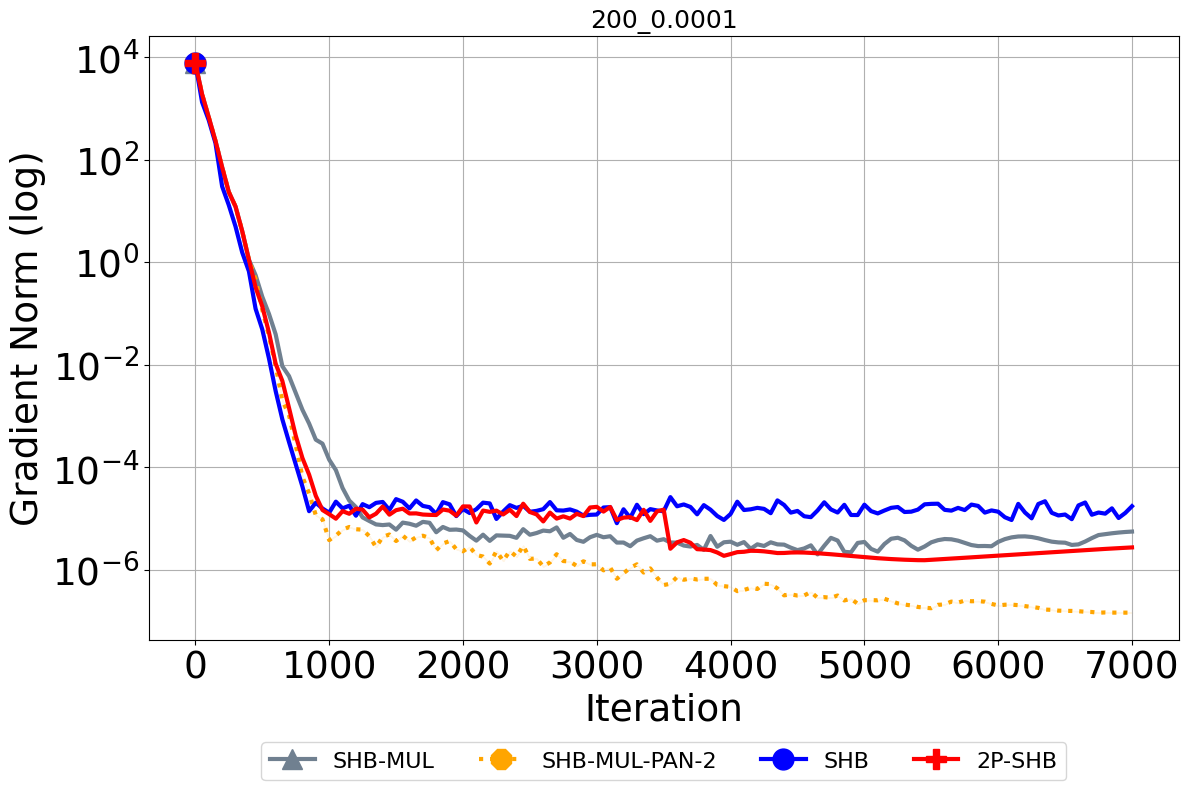

In [418]:

show_legend_all=None
rm = hr.ResultManager(
                    exp_list= loss_exp_dict["squared_loss"],
                    savedir_base=savedir_synthetic_non_interp_compare_0,
                    filterby_list=combined_filter_dict["squared_loss"],
                    verbose= 0       
                     )
rm.get_plot_all(
    avg_across='runs',
    plot_median=True,
    order='metrics_by_groups',
    show_legend_all=show_legend_all,
    legend_last_row_only=True,
    y_metric_list =  ['grad_norm'], 
    x_metric='itr',
    legend_list=['opt.name'], 
    title_list = ['kappa','variance'], 
    groupby_list = ['dataset', 'model', 'n_samples', 'variance', 'kappa'],
    log_metric_list = ["grad_norm", 'alpha_k', 'train_loss'],
    legend_fontsize=16,
    x_fontsize=27,
    y_fontsize=27,
    xtick_fontsize=27,
    ytick_fontsize=27,
    title_fontsize=18,
    result_step=50,
#     ylim_list=[[(10**(-8.5), 10**(-8))]], 
    #[(10**(-13), 10**(5))],[(10**(-13), 10**(5))]],# (10**(-3), 24), (10**(-3.1), 10**(-.8))]],(10**(0), 1e6)(-0.1, 1.1)(10**(-15), 10**(-4))
    
    map_ylabel_list=[{'train_loss':'Train loss'}, 
                     {'val_acc':'Validation accuracy'},
                     {'grad_norm': 'Gradient Norm'},
                     {'alpha_k': 'alpha_k'},
                     {'beta_k': 'beta_k'},
                     {'lambda_k': 'lambda_k'},
                     {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
    map_xlabel_list=[{'itr': 'Iteration'}],
                figsize=(12,8),
    plot_confidence=False,
     legend_kwargs={'bbox_to_anchor':[0.5, -0.2], 
                           'borderaxespad':0., 
                           'ncol':4,'loc':'center'},
    savedir_plots=f'./plots/squared_synthetic_non_interp_compare_0_{kappa}_{variance}' 
            )

# Logistic Loss

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[{'dataset': 'mushrooms', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'CNST', 'method': 'WANG21', 'is_sls': False, 'mis_spec': 1.0, 'ada': None, 'ld': None, 'ld_sche': None, 'c': 1}, 'regularization_factor': 0, 'batch_size': -1.1111111111111112, 'max_epoch': 5000, 'runs': 0, 'is_kernelize': 1}, {'dataset': 'mushrooms', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'CNST', 'method': 'WANG21', 'is_sls': False, 'mis_spec': 1.0, 'ada': None, 'ld': None, 'ld_sche': None, 'c': 1}, 'regularization_factor': 0, 'batch_size': -1.1111111111111112, 'max_epoch': 5000, 'runs': 1, 'is_kernelize': 1}, {'dataset': 'mushrooms', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'CNST', 'method': 'WANG21', 'is_sls': False, 'mis_spec': 1.0, 'ada': None, 'ld': None, 'ld_sche': None, 'c': 1}, 'regularization_factor': 0, 'batch_size': -1.1111111111111112, 'max_epoch': 5000, 'runs': 2, 'is_kernelize': 1}, {'dataset': 'mushrooms', 'loss_func': 'log

[<Figure size 1200x500 with 1 Axes>]

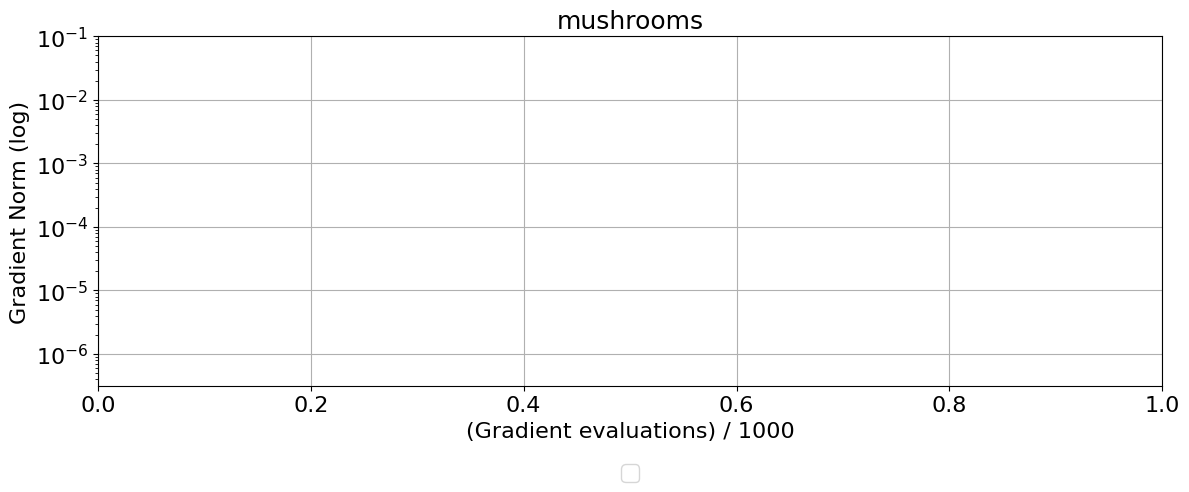

In [76]:
show_legend_all=None
rm = hr.ResultManager(
                    exp_list= loss_exp_dict["logistic_loss"],
                    savedir_base=savedir_mushroom_kernel_2,
                    filterby_list=combined_filter_dict["logistic_loss"],
                    verbose= 0       
                     )


rm.get_plot_all(
    avg_across='runs',
    plot_median=True,
    order='metrics_by_groups',
    show_legend_all=show_legend_all,
    legend_last_row_only=True,
    y_metric_list =  ['grad_norm'], 
    x_metric='itr',
    legend_list=['opt.name'], 
    title_list = ['dataset'], 
    groupby_list = ['dataset', 'model'],
    log_metric_list = ["grad_norm"],
    legend_fontsize=16,
    x_fontsize=16,
    y_fontsize=16,
    xtick_fontsize=16,
    ytick_fontsize=16,
    title_fontsize=18,
    result_step=1,
    ylim_list=[[(10**(-6.5), 10**(-1))]],#, (10**(-3.3), 10**(-0.1)), (10**(-3.6), 10**(-1))]],    
    map_ylabel_list=[{'train_loss':'Train loss'}, 
                     {'val_acc':'Validation accuracy'},
                     {'grad_norm': 'Gradient Norm'},
                     {'alpha_k': 'alpha_k'},
                     {'beta_k': 'beta_k'},
                     {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
    map_xlabel_list=[{'itr': '(Gradient evaluations) / 1000'}],
                figsize=(12,5),
    plot_confidence=True,
     legend_kwargs={'bbox_to_anchor':[0.5, -0.25], 'ncol':7, 'loc':'center'},
    savedir_plots='./plots/logistic_mushroom_kernel_2'
            )

In [44]:
datasets = ["ijcnn"]
exp_groups = []

for dataset in datasets:
    exp_groups.append("exp_" + dataset)
exp_list = form_exp_list(exp_groups, exp_config_fname)
# print([e['opt']['name'] for e in exp_list])

loss_exp_dict={}
combined_filter_dict={}

for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:
   
    rfilteres=[({"loss_func":loss_func})] 
    rest_exp=hr.filter_exp_list(exp_list, filterby_list=rfilteres, verbose=0)
    loss_exp_dict[loss_func]=rest_exp 

for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:
    filtered_best_exp_list=[]
    
    for alpha_t in ["CNST"]: 
#         for batch_size in [-1,-2,-4./3]:
#         for is_ADA in [True,False]:
            filtered_best_exp_list += [       
                ({
                  'opt':{'name':'EXP_SGD','alpha_t':alpha_t, "is_sls":False , 'is_ADA':False},  
                    "loss_func":loss_func},
                   {'style':styles["SGD_"+alpha_t]})]

#     filtered_best_exp_list +=[        
#             ({'opt':{'name':'EXP_SGD',"is_sls":True },  
#                 "loss_func":loss_func},
#                {'style':styles["EXP_SLS_DECR"]})]
    filtered_best_exp_list += [       
                ({
                  'opt':{'name':'EXP_SGD','alpha_t':alpha_t, "is_sls":False , 'is_ADA':True},  
                    "loss_func":loss_func},
                   {'style':styles["SGD_CNST_ADA"]})]
    
#     for alpha_t in ["CNST","EXP"]: 
    for alpha_t in ["CNST"]:
#         for method in ['SEBBOUH', 'POLYAK', 'GHADIMI', 'WANG21', 'WANG22']:
        for method in ['SEBBOUH', 'ADA']:
#             for misspec in [1,100]:
#             for batch_size in [-1,-2,-4./3]:
                filtered_best_exp_list += [        
                    ({
                      'opt':{'name':'EXP_SHB','alpha_t':alpha_t,'method':method, "is_sls":False},  
                        "loss_func":loss_func},
                       {'style':styles["SHB_"+alpha_t+"_"+method]})]
    

    combined_filter_dict[loss_func]=filtered_best_exp_list 

print(len(hr.filter_exp_list(loss_exp_dict["squared_loss"], filterby_list=combined_filter_dict["squared_loss"], verbose=0)  )  )
    

# for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:
#     filtered_best_exp_list=[]
# #     filtered_best_exp_list += [        
# #         ({'opt':{'name':'RIT_SGD'},  
# #             "loss_func":loss_func},
# #             {'style':styles["RIT_SGD"]})]

#     for alpha_t in ["CNST","DECR"]: 

# #         filtered_best_exp_list += [        
# #             ({'opt':{'name':'EXP_ACC_SGD','alpha_t':alpha_t}, 
# #                 "loss_func":loss_func},
# #                {'style':styles["EXP_ACC_SGD_"+alpha_t]})]

#         filtered_best_exp_list += [        
#             ({'opt':{'name':'EXP_SGD','alpha_t':alpha_t, "is_sls":False },  
#                 "loss_func":loss_func},
#                {'style':styles["EXP_SGD_"+alpha_t]})]

#     filtered_best_exp_list +=[        
#             ({'opt':{'name':'EXP_SGD',"is_sls":True },  
#                 "loss_func":loss_func},
#                {'style':styles["EXP_SLS_DECR"]})]
    
#     for alpha_t in ["CNST","DECR","EXP"]: 
#         filtered_best_exp_list += [        
#             ({'opt':{'name':'EXP_SHB','alpha_t':alpha_t, "is_sls":False },  
#                 "loss_func":loss_func},
#                {'style':styles["EXP_SHB_"+alpha_t]})]

   
#     combined_filter_dict[loss_func]=filtered_best_exp_list 
# # print(combined_filter_dict["squared_loss"])
# # print(loss_exp_dict["squared_loss"])
# print(len(hr.filter_exp_list(loss_exp_dict["logistic_loss"], filterby_list=combined_filter_dict["logistic_loss"], verbose=0)  )  )
    

20


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[{'dataset': 'rcv1', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'CNST', 'method': 'WANG21', 'is_sls': False, 'mis_spec': 1.0, 'ada': None, 'ld': None, 'ld_sche': None, 'c': 1}, 'regularization_factor': 0.01, 'batch_size': -1.1111111111111112, 'max_epoch': 500, 'runs': 0, 'is_subsample': 1, 'subsampled_n': 10000, 'is_kernelize': 1}, {'dataset': 'rcv1', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'CNST', 'method': 'WANG21', 'is_sls': False, 'mis_spec': 1.0, 'ada': None, 'ld': None, 'ld_sche': None, 'c': 1}, 'regularization_factor': 0.01, 'batch_size': -1.1111111111111112, 'max_epoch': 500, 'runs': 1, 'is_subsample': 1, 'subsampled_n': 10000, 'is_kernelize': 1}, {'dataset': 'rcv1', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'CNST', 'method': 'WANG21', 'is_sls': False, 'mis_spec': 1.0, 'ada': None, 'ld': None, 'ld_sche': None, 'c': 1}, 'regularization_factor': 0.01, 'batch_size': -1.1111111111111112, 'max_epoch': 500, '

[<Figure size 1900x500 with 1 Axes>]

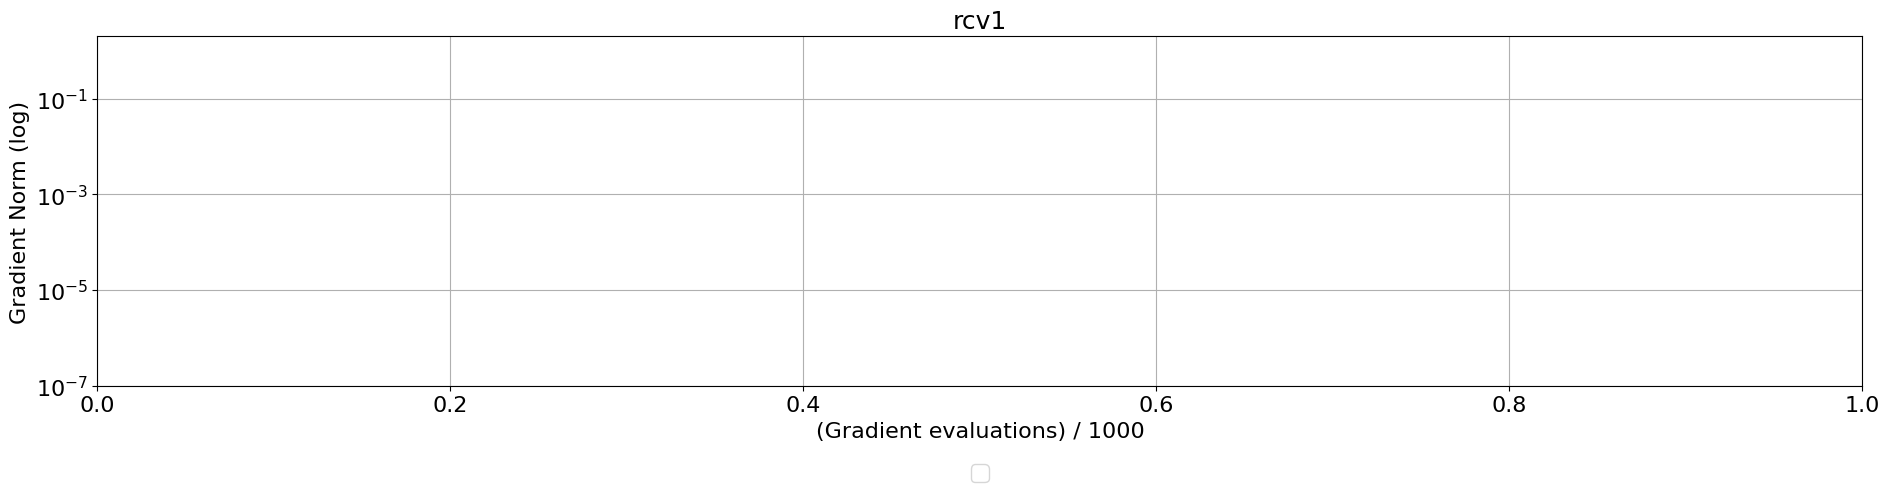

In [6]:

show_legend_all=None
rm = hr.ResultManager(
                    exp_list= loss_exp_dict["squared_loss"],
                    savedir_base=savedir_ijcnn_ada,
                    filterby_list=combined_filter_dict["squared_loss"],
                    verbose= 0       
                     )
rm.get_plot_all(
    avg_across='runs',
    plot_median=True,
    order='metrics_by_groups',
    show_legend_all=show_legend_all,
    legend_last_row_only=True,
    y_metric_list =  ['grad_norm'], 
    x_metric='itr',
    legend_list=['opt.name'], 
    title_list = ['dataset'], 
    groupby_list = ['dataset', 'model'],
    log_metric_list = ["grad_norm"],
    legend_fontsize=16,
     x_fontsize=16,
     y_fontsize=16,
     xtick_fontsize=16,
     ytick_fontsize=16,
     title_fontsize=18,
     result_step=1,
     ylim_list=[
                 [(10**(-7), 2.)]],# (10**(-3), 24), (10**(-3.1), 10**(-.8))]],
    
    map_ylabel_list=[{'train_loss':'Train loss'}, 
                     {'val_acc':'Validation accuracy'},
                     {'grad_norm': 'Gradient Norm'},
                     {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
    map_xlabel_list=[{'itr': '(Gradient evaluations) / 1000'}],
                figsize=(19,5),
    plot_confidence=True,
     legend_kwargs={'bbox_to_anchor':[0.5, -0.25],
                           'borderaxespad':0., 
                           'ncol':7,'loc':'center'},
    savedir_plots='./plots/squared_ijcnn_ada'
            )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[{'dataset': 'ijcnn', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'CNST', 'method': 'ADA', 'is_sls': False, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 100, 'runs': 0}, {'dataset': 'ijcnn', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'CNST', 'method': 'ADA', 'is_sls': False, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 100, 'runs': 1}, {'dataset': 'ijcnn', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'CNST', 'method': 'ADA', 'is_sls': False, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 100, 'runs': 2}, {'dataset': 'ijcnn', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'CNST', 'method': 'ADA', 'is_sls': False, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 100, 'runs': 3}, {'dataset': 'ijcnn', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'C

[<Figure size 1200x500 with 1 Axes>]

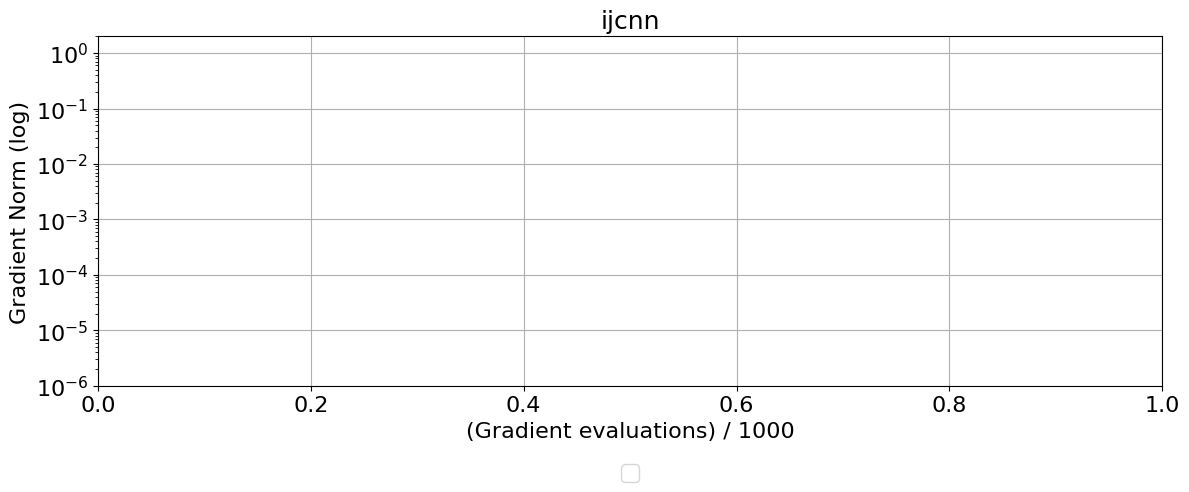

In [27]:
show_legend_all=None
rm = hr.ResultManager(
                    exp_list= loss_exp_dict["logistic_loss"],
                    savedir_base=savedir_ijcnn_ada,
                    filterby_list=combined_filter_dict["logistic_loss"],
                    verbose= 0       
                     )


rm.get_plot_all(
    avg_across='runs',
    plot_median=True,
    order='metrics_by_groups',
    show_legend_all=show_legend_all,
    legend_last_row_only=True,
    y_metric_list =  ['grad_norm'], 
    x_metric='itr',
    legend_list=['opt.name'], 
    title_list = ['dataset'], 
    groupby_list = ['dataset', 'model'],
    log_metric_list = ["grad_norm"],
    legend_fontsize=16,
     x_fontsize=16,
     y_fontsize=16,
     xtick_fontsize=16,
     ytick_fontsize=16,
     title_fontsize=18,
      ylim_list=[
                 [(10**(-6), 2.)]],#, (10**(-3.3), 10**(-0.1)), (10**(-3.6), 10**(-1))]],    
    map_ylabel_list=[{'train_loss':'Train loss'}, 
                     {'val_acc':'Validation accuracy'},
                     {'grad_norm': 'Gradient Norm'},
                     {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
    map_xlabel_list=[{'itr': '(Gradient evaluations) / 1000'}],
                figsize=(12,5),
    plot_confidence=True,
     legend_kwargs={'bbox_to_anchor':[0.5, -0.25], 'ncol':7, 'loc':'center'},
    savedir_plots='./logistic_ijcnn_ada'
            )

In [30]:
datasets = ["rcv1"]
exp_groups = []

for dataset in datasets:
    exp_groups.append("exp_" + dataset)
exp_list = form_exp_list(exp_groups, exp_config_fname)
# print([e['opt']['name'] for e in exp_list])

loss_exp_dict={}
combined_filter_dict={}

for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:
   
    rfilteres=[({"loss_func":loss_func})] 
    rest_exp=hr.filter_exp_list(exp_list, filterby_list=rfilteres, verbose=0)
    loss_exp_dict[loss_func]=rest_exp 

for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:
    filtered_best_exp_list=[]
    
    for alpha_t in ["CNST"]: 
        for batch_size in [-1,-2,-4./3]:
            filtered_best_exp_list += [       
                ({'batch_size': batch_size,
                  'opt':{'name':'EXP_SGD','alpha_t':alpha_t, "is_sls":False },  
                    "loss_func":loss_func},
                   {'style':styles["EXP_SGD_"+alpha_t+"_"+batch_sizes[batch_size]]})]

#     filtered_best_exp_list +=[        
#             ({'opt':{'name':'EXP_SGD',"is_sls":True },  
#                 "loss_func":loss_func},
#                {'style':styles["EXP_SLS_DECR"]})]
    
#     for alpha_t in ["CNST","EXP"]: 
    for alpha_t in ["CNST"]:
#         for method in ['SEBBOUH', 'POLYAK', 'GHADIMI', 'WANG21', 'WANG22']:
        for method in ['WANG22']:
#             for misspec in [1,100]:
            for batch_size in [-1,-2,-4./3]:
                filtered_best_exp_list += [        
                    ({'batch_size': batch_size, 
                      'opt':{'name':'EXP_SHB','alpha_t':alpha_t,'method':method, "is_sls":False},  
                        "loss_func":loss_func},
                       {'style':styles["SHB_"+alpha_t+"_"+method+"_"+batch_sizes[batch_size]]})]

    combined_filter_dict[loss_func]=filtered_best_exp_list 

print(len(hr.filter_exp_list(loss_exp_dict["squared_loss"], filterby_list=combined_filter_dict["squared_loss"], verbose=0)  )  )
    

30


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[{'dataset': 'rcv1', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'CNST', 'method': 'WANG22', 'is_sls': False, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': -1, 'max_epoch': 10000, 'runs': 0, 'is_subsample': 1, 'subsampled_n': 10000}, {'dataset': 'rcv1', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'CNST', 'method': 'WANG22', 'is_sls': False, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': -1, 'max_epoch': 10000, 'runs': 1, 'is_subsample': 1, 'subsampled_n': 10000}, {'dataset': 'rcv1', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'CNST', 'method': 'WANG22', 'is_sls': False, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': -1, 'max_epoch': 10000, 'runs': 2, 'is_subsample': 1, 'subsampled_n': 10000}, {'dataset': 'rcv1', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'CNST', 'method': 'WANG22', 'is_sls': False, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_

[<Figure size 1900x500 with 1 Axes>]

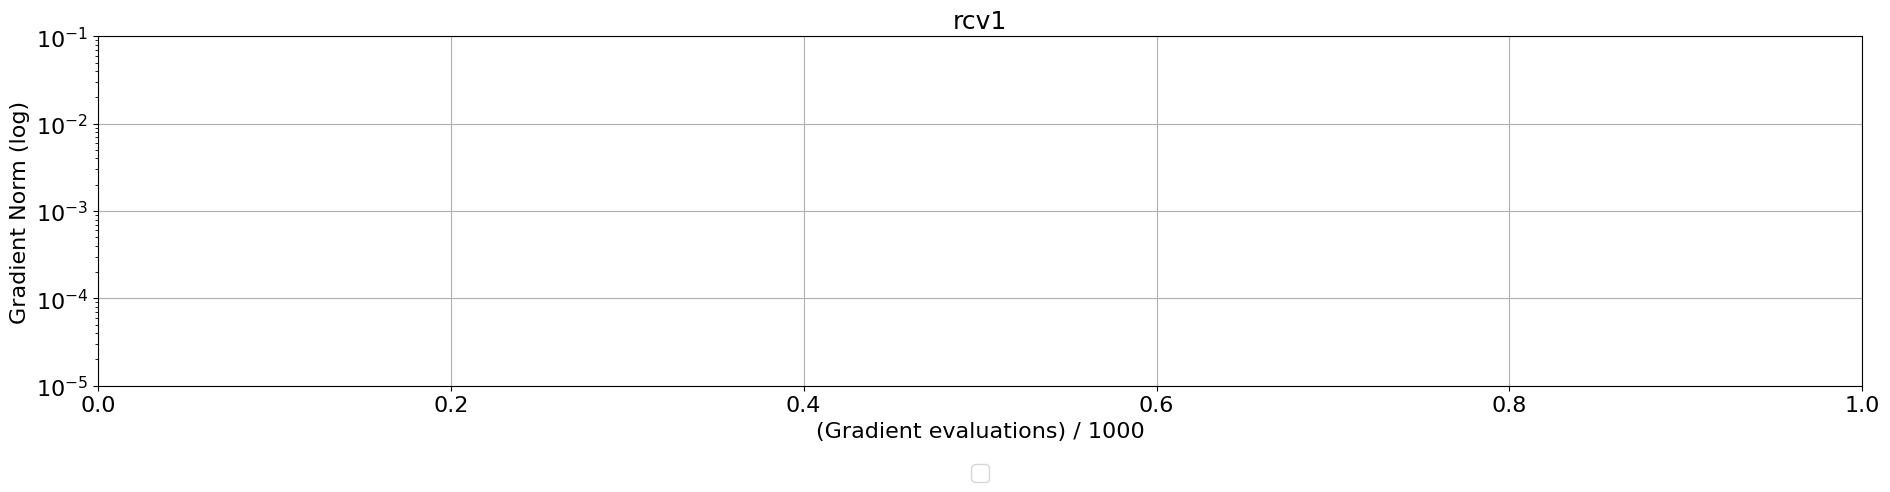

In [31]:
show_legend_all=None
rm = hr.ResultManager(
                    exp_list= loss_exp_dict["squared_loss"],
                    savedir_base=savedir_rcv1_sgd_shb_cnst,
                    filterby_list=combined_filter_dict["squared_loss"],
                    verbose= 0       
                     )
rm.get_plot_all(
    avg_across='runs',
    plot_median=True,
    order='metrics_by_groups',
    show_legend_all=show_legend_all,
    legend_last_row_only=True,
    y_metric_list =  ['grad_norm'], 
    x_metric='itr',
    legend_list=['opt.name'], 
    title_list = ['dataset'], 
    groupby_list = ['dataset', 'model'],
    log_metric_list = ["grad_norm"],
    legend_fontsize=16,
     x_fontsize=16,
     y_fontsize=16,
     xtick_fontsize=16,
     ytick_fontsize=16,
     title_fontsize=18,
    
     ylim_list=[
                 [(10**(-5), 10**(-1))]],# (10**(-3), 24), (10**(-3.1), 10**(-.8))]],
    
    map_ylabel_list=[{'train_loss':'Train loss'}, 
                     {'val_acc':'Validation accuracy'},
                     {'grad_norm': 'Gradient Norm'},
                     {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
    map_xlabel_list=[{'itr': '(Gradient evaluations) / 1000'}],
                figsize=(19,5),
    plot_confidence=True,
     legend_kwargs={'bbox_to_anchor':[.5, -0.25], 
                           'borderaxespad':0., 
                           'ncol':7,'loc':'center'},
    savedir_plots='./plots/squared_rcv1_sgd_shb_cnst'
            )

[{'dataset': 'rcv1', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 100, 'runs': 0, 'is_subsample': 1, 'subsampled_n': 10000}, {'dataset': 'rcv1', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 100, 'runs': 1, 'is_subsample': 1, 'subsampled_n': 10000}, {'dataset': 'rcv1', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 100, 'runs': 2, 'is_subsample': 1, 'subsampled_n': 10000}, {'dataset': 'rcv1', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_siz

[<Figure size 1200x500 with 1 Axes>]

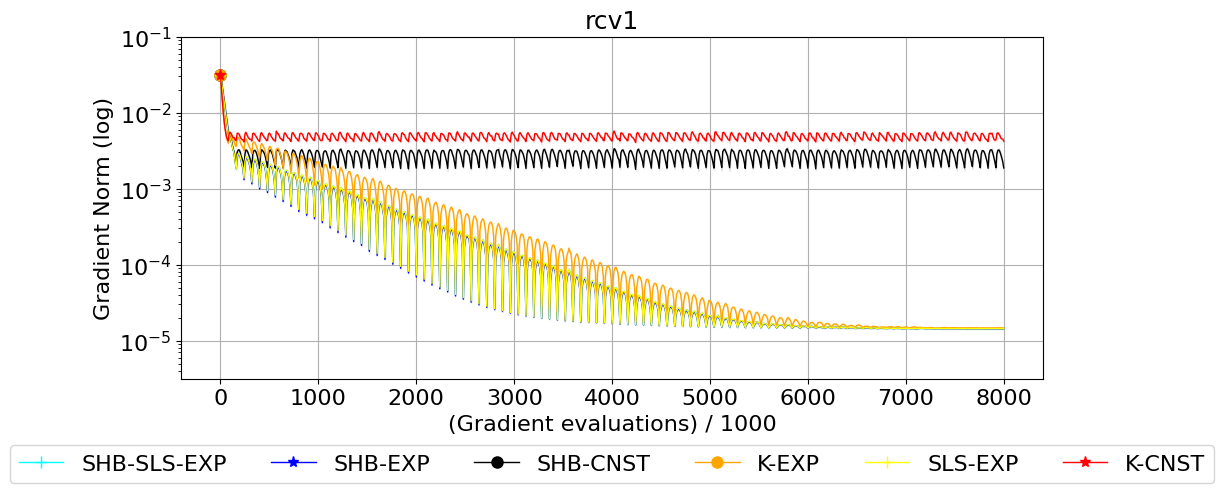

In [273]:
show_legend_all=None
rm = hr.ResultManager(
                    exp_list= loss_exp_dict["logistic_loss"],
                    savedir_base=savedir_rcv1_sgd_shb,
                    filterby_list=combined_filter_dict["logistic_loss"],
                    verbose= 0       
                     )


rm.get_plot_all(
    avg_across='runs',
    plot_median=True,
    order='metrics_by_groups',
    show_legend_all=show_legend_all,
    legend_last_row_only=True,
    y_metric_list =  ['grad_norm'], 
    x_metric='itr',
    legend_list=['opt.name'], 
    title_list = ['dataset'], 
    groupby_list = ['dataset', 'model'],
    log_metric_list = ["grad_norm"],
    legend_fontsize=16,
     x_fontsize=16,
     y_fontsize=16,
     xtick_fontsize=16,
     ytick_fontsize=16,
     title_fontsize=18,
      ylim_list=[
                 [(10**(-5.5), 10**(-1))]],#, (10**(-3.3), 10**(-0.1)), (10**(-3.6), 10**(-1))]],    
    map_ylabel_list=[{'train_loss':'Train loss'}, 
                     {'val_acc':'Validation accuracy'},
                     {'grad_norm': 'Gradient Norm'},
                     {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
    map_xlabel_list=[{'itr': '(Gradient evaluations) / 1000'}],
                figsize=(12,5),
    plot_confidence=True,
     legend_kwargs={'bbox_to_anchor':[.5, -0.25], 'ncol':6, 'loc':'center'},
    savedir_plots='./logistic_rcv1_sgd_shb'
            )

In [263]:
datasets = ["rcv1"]
exp_groups = []

for dataset in datasets:
    exp_groups.append("exp_" + dataset)
exp_list = form_exp_list(exp_groups, exp_config_fname)
# print([e['opt']['name'] for e in exp_list])

loss_exp_dict={}
combined_filter_dict={}

for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:
   
    rfilteres=[({"loss_func":loss_func})] 
    rest_exp=hr.filter_exp_list(exp_list, filterby_list=rfilteres, verbose=0)
    loss_exp_dict[loss_func]=rest_exp 

for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:
    filtered_best_exp_list=[]
    
    for alpha_t in ["EXP","CNST"]: 
        for method in ['SEBBOUH']:
            filtered_best_exp_list += [        
                ({'opt':{'name':'EXP_SHB','alpha_t':alpha_t,'method':method, "is_sls":False },  
                    "loss_func":loss_func},
                   {'style':styles["SHB_"+alpha_t+"_"+method]})]
    filtered_best_exp_list +=[        
        ({'opt':{'name':'EXP_SHB',"is_sls":True },  
            "loss_func":loss_func},
           {'style':styles["SHB_EXP_SEBBOUH_SLS"]})]

    combined_filter_dict[loss_func]=filtered_best_exp_list 

print(len(hr.filter_exp_list(loss_exp_dict["logistic_loss"], filterby_list=combined_filter_dict["logistic_loss"], verbose=0)))
    

15


[{'dataset': 'rcv1', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 100, 'runs': 0, 'is_subsample': 1, 'subsampled_n': 10000}, {'dataset': 'rcv1', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 100, 'runs': 1, 'is_subsample': 1, 'subsampled_n': 10000}, {'dataset': 'rcv1', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 100, 'runs': 2, 'is_subsample': 1, 'subsampled_n': 10000}, {'dataset': 'rcv1', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_siz

[<Figure size 1200x500 with 1 Axes>]

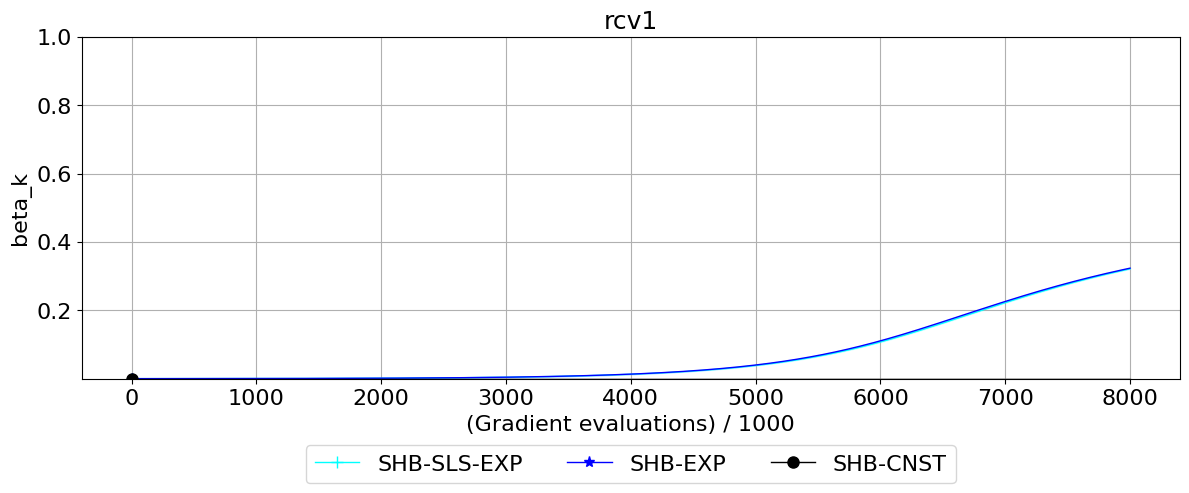

In [269]:
show_legend_all=None
rm = hr.ResultManager(
                    exp_list= loss_exp_dict["logistic_loss"],
                    savedir_base=savedir_rcv1_sgd_shb,
                    filterby_list=combined_filter_dict["logistic_loss"],
                    verbose= 0       
                     )


rm.get_plot_all(
    avg_across='runs',
    plot_median=True,
    order='metrics_by_groups',
    show_legend_all=show_legend_all,
    legend_last_row_only=True,
    y_metric_list =  ['beta_k'], 
    x_metric='itr',
    legend_list=['opt.name'], 
    title_list = ['dataset'], 
    groupby_list = ['dataset', 'model'],
    log_metric_list = ['grad_norm', 'alpha_k'],
    legend_fontsize=16,
     x_fontsize=16,
     y_fontsize=16,
     xtick_fontsize=16,
     ytick_fontsize=16,
     title_fontsize=18,
      ylim_list=[
                 [(10**(-4), 1)]],#, (10**(-3.3), 10**(-0.1)), (10**(-3.6), 10**(-1))]],    
    map_ylabel_list=[{'train_loss':'Train loss'}, 
                     {'val_acc':'Validation accuracy'},
                     {'grad_norm': 'Gradient Norm'},
                     {'alpha_k': 'alpha_k'},
                     {'beta_k': 'beta_k'},
                     {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
    map_xlabel_list=[{'itr': '(Gradient evaluations) / 1000'}],
                figsize=(12,5),
    plot_confidence=True,
     legend_kwargs={'bbox_to_anchor':[.5, -0.25], 'ncol':6, 'loc':'center'},
    savedir_plots='./logistic_rcv1_sgd_shb_betak'
            )

[{'dataset': 'rcv1', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 100, 'runs': 0, 'is_subsample': 1, 'subsampled_n': 10000}, {'dataset': 'rcv1', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 100, 'runs': 1, 'is_subsample': 1, 'subsampled_n': 10000}, {'dataset': 'rcv1', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 100, 'runs': 2, 'is_subsample': 1, 'subsampled_n': 10000}, {'dataset': 'rcv1', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 

[<Figure size 1200x500 with 1 Axes>]

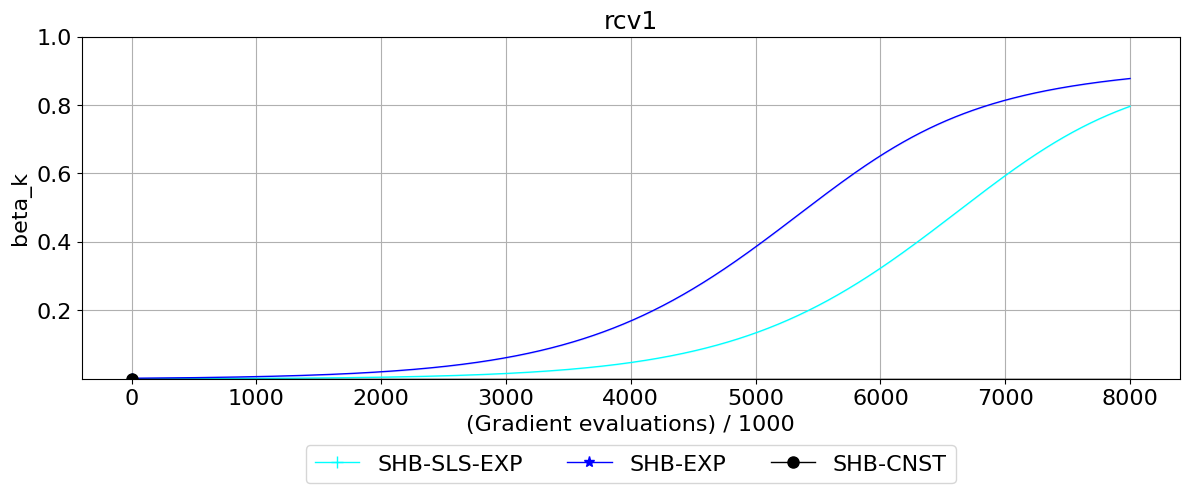

In [268]:
show_legend_all=None
rm = hr.ResultManager(
                    exp_list= loss_exp_dict["squared_loss"],
                    savedir_base=savedir_rcv1_sgd_shb,
                    filterby_list=combined_filter_dict["squared_loss"],
                    verbose= 0       
                     )
rm.get_plot_all(
    avg_across='runs',
    plot_median=True,
    order='metrics_by_groups',
    show_legend_all=show_legend_all,
    legend_last_row_only=True,
    y_metric_list =  ['beta_k'], 
    x_metric='itr',
    legend_list=['opt.name'], 
    title_list = ['dataset'], 
    groupby_list = ['dataset', 'model'],
    log_metric_list = ['alpha_k'],
    legend_fontsize=16,
     x_fontsize=16,
     y_fontsize=16,
     xtick_fontsize=16,
     ytick_fontsize=16,
     title_fontsize=18,
    
     ylim_list=[
                 [((10)**(-6), 1)]],# (10**(-3), 24), (10**(-3.1), 10**(-.8))]],
    
    map_ylabel_list=[{'train_loss':'Train loss'}, 
                     {'val_acc':'Validation accuracy'},
                     {'grad_norm': 'Gradient Norm'},
                     {'alpha_k': 'alpha_k'},
                     {'beta_k': 'beta_k'},
                     {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
    map_xlabel_list=[{'itr': '(Gradient evaluations) / 1000'}],
                figsize=(12,5),
    plot_confidence=True,
     legend_kwargs={'bbox_to_anchor':[.5, -0.25], 
                           'borderaxespad':0., 
                           'ncol':7,'loc':'center'},
    savedir_plots='./squared_rcv1_sgd_shb_betak'
            )

In [4]:
def form_exp_list(exp_groups, exp_config_fname):
    exp_list = []
    for e in exp_groups:
        exp_list += hu.load_py(exp_config_fname).EXP_GROUPS[e]
    return exp_list


# print(form_exp_list(["exp_mushrooms", "exp_ijcnn","exp_rcv1"],exp_config_fname))


markersize = 8
markevery = 20
linewidth = 1
styles = {}

styles['SHB_CNST_SEBBOUH'] = {'label':'SHB-CNST',  'color':'black',
                         'markersize':markersize, 'marker':'o',
                           'linewidth': linewidth,
                     'markevery':markevery }
styles['SHB_CNST_ADA'] = {'label':'SHB-ADA',  'color':'black',
                         'markersize':markersize, 'marker':'*',
                           'linewidth': linewidth,
                     'markevery':markevery }
# styles['SHB_CNST_WANG22_THREE_FOURTH'] = {'label':'SHB-CNST-THREE-FOURTH',  'color':'red',
#                          'markersize':markersize, 'marker':'*',
#                            'linewidth': linewidth,
#                      'markevery':markevery }

styles['SGD_CNST'] = {'label':'K-CNST',  'color':'blue',
                         'markersize':markersize, 'marker':'o',
                           'linewidth': linewidth,
                     'markevery':markevery }
styles['SGD_CNST_ADA'] = {'label':'K-ADA',  'color':'blue',
                         'markersize':markersize, 'marker':'+',
                           'linewidth': linewidth,
                     'markevery':markevery }

styles['SHB_EXP_SEBBOUH'] = {'label':'SHB-EXP',  'color':'red',
                         'markersize':markersize, 'marker':'o',
                           'linewidth': linewidth,
                     'markevery':markevery }
styles['SHB_ADA_0.1'] = {'label':'SHB-ADA-0.1',  'color':'blue',
                         'markersize':markersize, 'marker':'*',
                           'linewidth': linewidth,
                     'markevery':markevery }
styles['SHB_ADA_0.01'] = {'label':'SHB-ADA-0.01',  'color':'black',
                         'markersize':markersize, 'marker':'*',
                           'linewidth': linewidth,
                     'markevery':markevery }
styles['SHB_ADA_0.001'] = {'label':'SHB-ADA-0.001',  'color':'red',
                         'markersize':markersize, 'marker':'*',
                           'linewidth': linewidth,
                     'markevery':markevery }
styles['SHB_ADA_0.0001'] = {'label':'SHB-ADA-0.0001',  'color':'orange',
                         'markersize':markersize, 'marker':'*',
                           'linewidth': linewidth,
                     'markevery':markevery }
styles['SHB_ADA_1e-05'] = {'label':'SHB-ADA-1e-5',  'color':'cyan',
                         'markersize':markersize, 'marker':'*',
                           'linewidth': linewidth,
                     'markevery':markevery }
styles['SGD_ADA_0.1'] = {'label':'SHB-ADA-0.1',  'color':'blue',
                         'markersize':markersize, 'marker':'o',
                           'linewidth': linewidth,
                     'markevery':markevery }
styles['SGD_ADA_0.01'] = {'label':'SHB-ADA-0.01',  'color':'black',
                         'markersize':markersize, 'marker':'o',
                           'linewidth': linewidth,
                     'markevery':markevery }
styles['SGD_ADA_0.001'] = {'label':'SHB-ADA-0.001',  'color':'red',
                         'markersize':markersize, 'marker':'o',
                           'linewidth': linewidth,
                     'markevery':markevery }
styles['SGD_ADA_0.0001'] = {'label':'SHB-ADA-0.0001',  'color':'orange',
                         'markersize':markersize, 'marker':'o',
                           'linewidth': linewidth,
                     'markevery':markevery }
styles['SGD_ADA_1e-05'] = {'label':'SHB-ADA-1e-5',  'color':'cyan',
                         'markersize':markersize, 'marker':'o',
                           'linewidth': linewidth,
                     'markevery':markevery }

# styles['EXP_SGD_CNST_THREE_FOURTH'] = {'label':'K-CNST-THREE-FOURTH',  'color':'red',
#                          'markersize':markersize, 'marker':'o',
#                            'linewidth': linewidth,
#                      'markevery':markevery }

# styles['EXP_SLS_DECR'] = {'label':'SLS-EXP',  'color':'yellow',
#                          'markersize':markersize, 'marker':'+',
#                            'linewidth': linewidth,
#                      'markevery':markevery }

# styles['SHB_EXP_POLYAK_1'] = {'label':'SHB-EXP-POLYAK',  'color':'black',
#                          'markersize':markersize, 'marker':'*',
#                            'linewidth': linewidth,
#                      'markevery':markevery }
# styles['SHB_CNST_POLYAK_1'] = {'label':'SHB-CNST-POLYAK',  'color':'black',
#                          'markersize':markersize, 'marker':'o',
#                            'linewidth': linewidth,
#                      'markevery':markevery }
# styles['SHB_EXP_POLYAK_100'] = {'label':'SHB-EXP-POLYAK-MIS',  'color':'blue',
#                          'markersize':markersize, 'marker':'*',
#                            'linewidth': linewidth,
#                      'markevery':markevery }
# styles['SHB_CNST_POLYAK_100'] = {'label':'SHB-CNST-POLYAK-MIS',  'color':'blue',
#                          'markersize':markersize, 'marker':'o',
#                            'linewidth': linewidth,
#                      'markevery':markevery }

# styles['SHB_EXP_GHADIMI'] = {'label':'SHB-EXP-GHADIMI',  'color':'orange',
#                          'markersize':markersize, 'marker':'*',
#                            'linewidth': 1,
#                      'markevery':markevery }
# styles['SHB_CNST_GHADIMI'] = {'label':'SHB-CNST-GHADIMI',  'color':'orange',
#                          'markersize':markersize, 'marker':'o',
#                            'linewidth': linewidth,
#                      'markevery':markevery }

# styles['SHB_EXP_WANG21'] = {'label':'SHB-EXP-WANG21',  'color':'blue',
#                          'markersize':markersize, 'marker':'*',
#                            'linewidth': linewidth,
#                      'markevery':markevery }
# styles['SHB_CNST_WANG21'] = {'label':'SHB-CNST-WANG21',  'color':'blue',
#                          'markersize':markersize, 'marker':'o',
#                            'linewidth': linewidth,
#                      'markevery':markevery }

# styles['SHB_EXP_WANG22_1'] = {'label':'SHB-EXP-WANG22',  'color':'cyan',
#                          'markersize':markersize, 'marker':'*',
#                            'linewidth': linewidth,
#                      'markevery':markevery }
# styles['SHB_CNST_WANG22_1'] = {'label':'SHB-CNST-WANG22',  'color':'cyan',
#                          'markersize':markersize, 'marker':'o',
#                            'linewidth': linewidth,
#                      'markevery':markevery }

# styles['SHB_EXP_WANG22_100'] = {'label':'SHB-EXP-WANG22-MIS',  'color':'orange',
#                          'markersize':markersize, 'marker':'*',
#                            'linewidth': linewidth,
#                      'markevery':markevery }
# styles['SHB_CNST_WANG22_100'] = {'label':'SHB-CNST-WANG22-MIS',  'color':'orange',
#                          'markersize':markersize, 'marker':'o',
#                            'linewidth': linewidth,
#                      'markevery':markevery }

In [5]:
datasets = ["mushrooms"]
exp_groups = []

for dataset in datasets:
    exp_groups.append("exp_" + dataset)
exp_list = form_exp_list(exp_groups, exp_config_fname)
# print([e['opt']['name'] for e in exp_list])

loss_exp_dict={}
combined_filter_dict={}

for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:
   
    rfilteres=[({"loss_func":loss_func})] 
    rest_exp=hr.filter_exp_list(exp_list, filterby_list=rfilteres, verbose=0)
    loss_exp_dict[loss_func]=rest_exp 


for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:
    filtered_best_exp_list=[]
    
#     for alpha_t in ["CNST","DECR"]: 
    for alpha_t in ["CNST"]: 
#         for batch_size in [-1,-2,-4./3]:
#         for is_ADA in [True,False]:
        for ada in [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]:
            filtered_best_exp_list += [       
                ({
                  'opt':{'name':'EXP_SGD','alpha_t':alpha_t, "is_sls":False , "ada": ada},  
                    "loss_func":loss_func},
                   {'style':styles["SGD_ADA_"+str(ada)]})]

    filtered_best_exp_list +=[        
            ({'opt':{'name':'EXP_SGD','alpha_t': "CNST",'is_sls': False,'ada': None},  
                "loss_func":loss_func},
               {'style':styles["SGD_CNST_ADA"]})]
#     filtered_best_exp_list += [       
#                 ({
#                   'opt':{'name':'EXP_SGD','alpha_t':alpha_t, "is_sls":False , 'is_ADA':True},  
#                     "loss_func":loss_func},
#                    {'style':styles["SGD_CNST_ADA"]})]
    
#     for alpha_t in ["CNST","EXP"]: 
    for alpha_t in ["CNST"]:
#         for method in ['SEBBOUH', 'POLYAK', 'GHADIMI', 'WANG21', 'WANG22']:
        for method in ['ADA']:
#             for misspec in [1,100]:
#             for batch_size in [-1,-2,-4./3]:
            for ada in [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]:
                for ld in [0.1, 0.5, 1]:
                    filtered_best_exp_list += [        
                        ({
                          'opt':{'name':'EXP_SHB','alpha_t':alpha_t,'method':method, "is_sls":False, "ada": ada, "ld": ld},  
                            "loss_func":loss_func},
                           {'style':styles["SHB_"+method+"_"+str(ada)]})]
    
    
    filtered_best_exp_list +=[        
            ({'opt':{'name':'EXP_SHB', 'alpha_t':'CNST','method':'SEBBOUH', "is_sls":False, "ada": None, "ld": None},  
                "loss_func":loss_func},
               {'style':styles["SHB_EXP_SEBBOUH"]})]
    
#     filtered_best_exp_list +=[        
#             ({'opt':{'name':'ADAM'},  
#                 "loss_func":loss_func},
#                {'style':styles["ADAM"]})]

    combined_filter_dict[loss_func]=filtered_best_exp_list 

print(len(hr.filter_exp_list(loss_exp_dict["squared_loss"], filterby_list=combined_filter_dict["squared_loss"], verbose=0)  )  )

30


In [ ]:
datasets = ["mushrooms"]
exp_groups = []

for dataset in datasets:
    exp_groups.append("exp_" + dataset)
exp_list = form_exp_list(exp_groups, exp_config_fname)
# print([e['opt']['name'] for e in exp_list])

loss_exp_dict={}
combined_filter_dict={}

for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:
   
    rfilteres=[({"loss_func":loss_func})] 
    rest_exp=hr.filter_exp_list(exp_list, filterby_list=rfilteres, verbose=0)
    loss_exp_dict[loss_func]=rest_exp 


for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:
    filtered_best_exp_list=[]
    
#     for alpha_t in ["CNST","DECR"]: 
#     for alpha_t in ["CNST"]: 
# #         for batch_size in [-1,-2,-4./3]:
# #         for is_ADA in [True,False]:
#         for ada in [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]:
#             filtered_best_exp_list += [       
#                 ({
#                   'opt':{'name':'EXP_SGD','alpha_t':alpha_t, "is_sls":False , "ada": ada},  
#                     "loss_func":loss_func},
#                    {'style':styles["SGD_ADA_"+str(ada)]})]
#     for batch_size in [10000]:
#     for batch_size in [-1]:
#         filtered_best_exp_list +=[        
#                 ({'opt':{'name':'EXP_SGD','alpha_t': "CNST", 'is_sls': False,'ada': None},  
#                     "loss_func":loss_func, 'batch_size':batch_size},
#                    {'style':styles["SGD_CNST_"+batch_sizes[batch_size]]})]
#         batch_sizes[batch_size]
#         str(batch_size)
#     filtered_best_exp_list += [       
#                 ({
#                   'opt':{'name':'EXP_SGD','alpha_t':alpha_t, "is_sls":False , 'is_ADA':True},  
#                     "loss_func":loss_func},
#                    {'style':styles["SGD_CNST_ADA"]})]
    
#     for alpha_t in ["CNST","EXP"]: 
#     for alpha_t in ["CNST"]:
# #         for method in ['SEBBOUH', 'POLYAK', 'GHADIMI', 'WANG21', 'WANG22']:
#         for method in ['ADA']:
# #             for misspec in [1,100]:
# #             for batch_size in [-1,-2,-4./3]:
#             for ada in [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]:
#                 for ld in [0.1, 0.5, 1]:
#                     filtered_best_exp_list += [        
#                         ({
#                           'opt':{'name':'EXP_SHB','alpha_t':alpha_t,'method':method, "is_sls":False, "ada": ada, "ld": ld},  
#                             "loss_func":loss_func},
#                            {'style':styles["SHB_"+method+"_"+str(ada)]})]
    
#     for batch_size in [10000]:
    for batch_size in [-1]:
        for method in ['SEBBOUH','WANG22']:
            filtered_best_exp_list +=[        
                    ({'opt':{'name':'EXP_SHB', 'alpha_t':'CNST', 'method':method},  
                        "loss_func":loss_func, 'batch_size':batch_size},
                       {'style':styles["SHB_"+method+"_"+batch_sizes[batch_size]]})]
    
#     filtered_best_exp_list +=[        
#             ({'opt':{'name':'ADAM'},  
#                 "loss_func":loss_func},
#                {'style':styles["ADAM"]})]

    combined_filter_dict[loss_func]=filtered_best_exp_list 

print(len(hr.filter_exp_list(loss_exp_dict["squared_loss"], filterby_list=combined_filter_dict["squared_loss"], verbose=0)  )  )

In [ ]:
def form_exp_list(exp_groups, exp_config_fname):
    exp_list = []
    for e in exp_groups:
        exp_list += hu.load_py(exp_config_fname).EXP_GROUPS[e]
    return exp_list


# print(form_exp_list(["exp_mushrooms", "exp_ijcnn","exp_rcv1"],exp_config_fname))


markersize = 8
markevery = 1000
linewidth = 1
styles = {}


styles['SGD_CNST_8000'] = {'label':'SGD-CNST-HALF',  'color':'red',
                         'markersize':markersize, 'marker':'o',
                           'linewidth': linewidth,
                     'markevery':markevery }

styles['SGD_CNST_FULL'] = {'label':'SGD-CNST-FULL',  'color':'blue',
                         'markersize':markersize, 'marker':'o',
                           'linewidth': linewidth,
                     'markevery':markevery }

styles['SGD_CNST_5000'] = {'label':'SGD-CNST-1000',  'color':'black',
                         'markersize':markersize, 'marker':'o',
                           'linewidth': linewidth,
                     'markevery':markevery }
styles['SHB_SEBBOUH_8000'] = {'label':'SGD-SEBBOUH-HALF',  'color':'red',
                         'markersize':markersize, 'marker':'*',
                           'linewidth': linewidth,
                     'markevery':markevery }
styles['SHB_SEBBOUH_FULL'] = {'label':'SHB-SEBBOUH-FULL',  'color':'blue',
                         'markersize':markersize, 'marker':'*',
                           'linewidth': linewidth,
                     'markevery':markevery }
styles['SHB_SEBBOUH_5000'] = {'label':'SHB-SEBBOUH-1000',  'color':'black',
                         'markersize':markersize, 'marker':'*',
                           'linewidth': linewidth,
                     'markevery':markevery }
styles['SHB_POLYAK_HALF'] = {'label':'SGD-POLYAK-HALF',  'color':'red',
                         'markersize':markersize, 'marker':'+',
                           'linewidth': linewidth,
                     'markevery':markevery }
styles['SHB_WANG22_FULL'] = {'label':'SHB-WANG22-FULL',  'color':'red',
                         'markersize':markersize, 'marker':'+',
                           'linewidth': linewidth,
                     'markevery':markevery }
styles['SHB_POLYAK_1000'] = {'label':'SHB-POLYAK-1000',  'color':'black',
                         'markersize':markersize, 'marker':'+',
                           'linewidth': linewidth,
                     'markevery':markevery }